## Краткий конспект теории и решение заданий с регулярными выражениями   

### В этом ноутбуке представлен краткий теоретический конспект, особенности функций модуля "re", разбор специфики работы с группами и флагами, практические задания. 

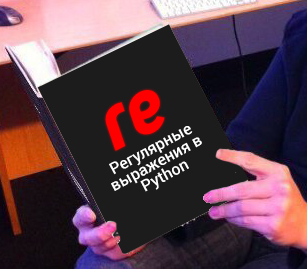

СТРУКТУРА:  

1. Регулярные выражения и их синтаксис  
    1.1. Сырые строки, экранирование, квадратные скобки для поиска и проверки   
    1.2. Шаблоны для поиска и проверки, вариации использования  
    1.3. Жадные и ленивые квантификаторы   
    1.4. Группирующие скобки, именованные и нумерованные группы, ссылки  
    1.5. Скобочные выражения   
    1.6. Операция "или"    
    1.7. ReDoS-атака, catastrophic backtracking, притяжат. квантификаторы, атомарная группировка    
    1.8. Правила использования регулярных выражений
2. Объект Match (основные методы и атрибуты)  
3. Функции модуля re (re.search(), re.match(), re.fullmatch(), re.finditer(), re.findall(), re.split(), re.sub() и т.д.)  
4. Функции с группами
5. Дополнительные задачи   

#### Примеры использования регулярных выражений в реальных задачах:  
- Определение нужного формата, например тлф. номера или email-адреса;  
- Разбиение строк на подстроки;  
- Поиск, замена и извлечение символов;  
- Быстрое выполнение нетривиальных операций.

In [1]:
import re
import numpy as np
import pandas as pd

import calendar, string, math, itertools, string
from itertools import permutations
from datetime import datetime as dt
from math import *
# from math import pi    

# 1. Регулярные выражения и их синтаксис

1.1. Сырые строки, экранирование, квадратные скобки для поиска и проверки   
1.2. Шаблоны для поиска и проверки, вариации использования  
1.3. Жадные и ленивые квантификаторы   
1.4. Группирующие скобки, именованные и нумерованные группы, ссылки

## 1.1. Сырые строки, экранирование, квадратные скобки для поиска и проверки

Наиболее удобные онлайн-сервисы для проверки регулярного выражения:    
- <a href="https://regex101.com/">regex101</a> (необходимо предварительно выбрать язык программирования)    
- <a href="https://pythex.org/">pythex</a> (нет необходимости выбирать язык, создан специально для Python)   

Полезные строки. Для тестирования регулярных выражений может понадобиться английский/русский алфавит, цифры, или символы:      
- <=>?@[]^_`{|}~ !"#$%&\'()*+,-./:; 
- ABCDEFGHIJKLMNOPQRSTUVWXYZ    
- abcdefghijklmnopqrstuvwxyz{|}~    
- абвгдеёжзийклмнопрстуфхцчшщъыьэюяАБВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯ    
- 0123456789    

In [3]:
from string import printable
print(printable)

0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 	



**Для сложных заданий**
В некоторых заданиях присутствуют большие тесты. Ошибку в них найти довольно сложно, поэтому можно использовать сторонние сервисы для сравнения текста, например:  

- textcompare.ru/app  
- text.num2word.ru/  
- prostudio.ru/tools/compare-text/  

**Сырые строки**     
Чтобы строка стала «сырой», перед ней необходимо поставить символ r в любом регистре. В такой строке отключается экранирование. Это значит, что обратный слеш считается самостоятельным символом. Основное применение сырых строк – работа с регулярными выражениями.  

**f-строки**   
Символы, которые ставятся перед началом строки, и изменяют её поведение, называются префиксами. Префикс f позволяет форматировать строку, вставляя в неё какие-либо выражения.  

**Комбинируем префиксы**    
Можно использовать несколько префиксов одновременно (rf, fr). В f-строках запрещено использовать обратный слеш \ (ограничение f-строк, при нарушении которого появляется ошибка *SyntaxError: f-string expression part cannot include a backslash*). Разницы между fr-строками и rf-строками нет. 

### f-строки

In [12]:
name = 'Emiliya'
age = 25

# f-строки
print(f'My name is {name}. I`m {age} years old.')

# Позволяют форматировать дату без вызова метода strftime()
now = dt.now()
print(f"Текущее время {now:%d.%m.%Y %H:%M}")

# Поддерживают расширенное форматирование чисел
print(f"Значение числа pi: {pi:.2f}")

# Позволяют выполнять различные арифметические операции
x, y = 7, 5
print(f"{x} x {y} / 2 = {x * y / 2}")

# Позволяют обращаться к значениям списков по индексу и к элементам словаря по ключу
our_planet = {"name": "Земля", "radius": 6378000}
print(f"Планета {our_planet['name']}. Радиус {our_planet['radius'] / 1000} км.")

# Позволяют вызывать методы объектов и функции
print(f"Name: {name.upper()}")
print(f'18 / 2 = {round(18 / 2)}')

My name is Emiliya. I`m 25 years old.
Текущее время 01.06.2023 22:08
Значение числа pi: 3.14
7 x 5 / 2 = 17.5
Планета Земля. Радиус 6378.0 км.
Name: EMILIYA
18 / 2 = 9


### Использование квадратных скобок

1) Квадратные скобки используются для замены одного из указанных символов:

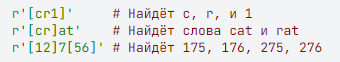

Перестановка символов не меняет результат (кроме спецсимволов):

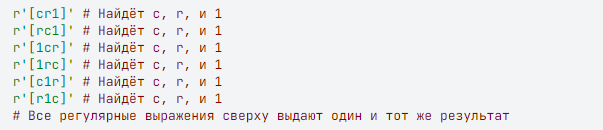

2) Если необходимо исключить какие-либо символы, нужно прописать перед ними **знак ^**:

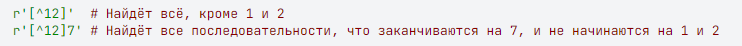

Если символ ^ не стоит в начале скобок или он экранирован - он воспринимается как обычный текст:

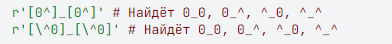

3) Регулярное выражение в скобках можно сократить:

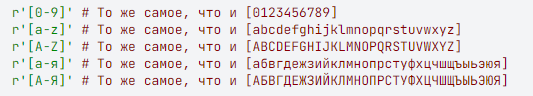

Можно получить неполный алфавит, или не все цифры:

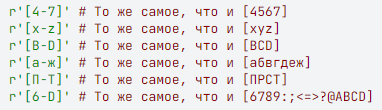

А также совмещать синтаксис:

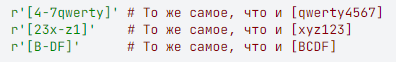

Распространённая ошибка: регулярное выражение [21-47] не найдёт числа от 21 до 47, оно будет равносильно выражению [212347].  

Чтобы использовать "-" как обычный символ - его достаточно экранировать или поставить в конец или начало скобок:

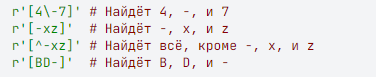

4) Исключение символов тоже можно сократить:

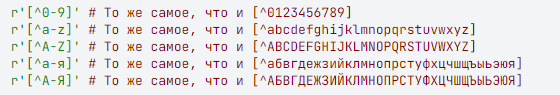

Можно исключить неполный алфавит, или не все цифры:    

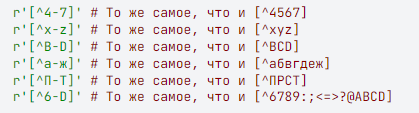

совмещать:    


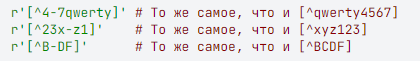

5) Можно комбинировать сокращения:        

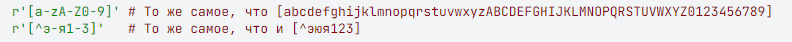

6) Если квадратные скобки нужно использовать как обычный текст - достаточно их просто экранировать:     


    

Шаблон [а-яА-Я] не захватывает буквы ё и Ё. Если они  нужны в выводе  -  необходимо указать их  вручную: [а-яА-ЯёЁ].

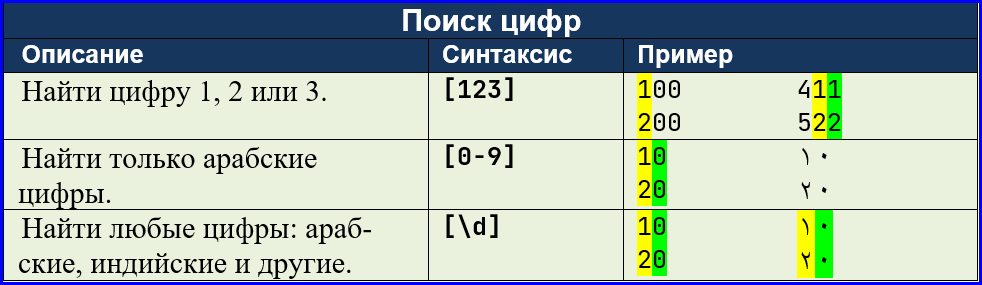  
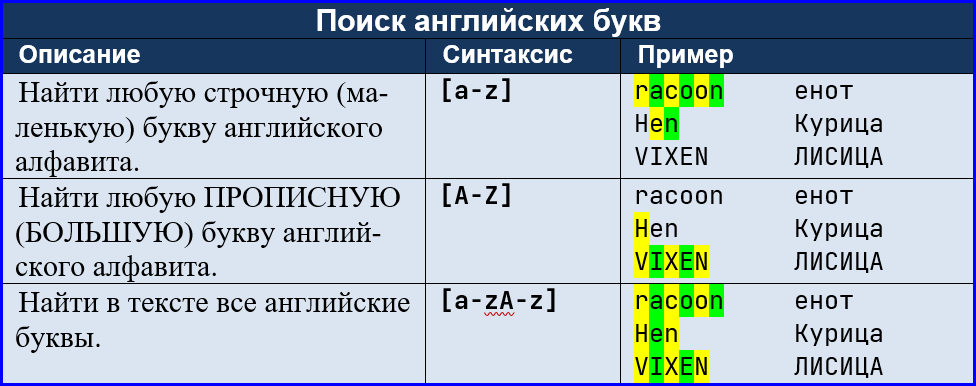  
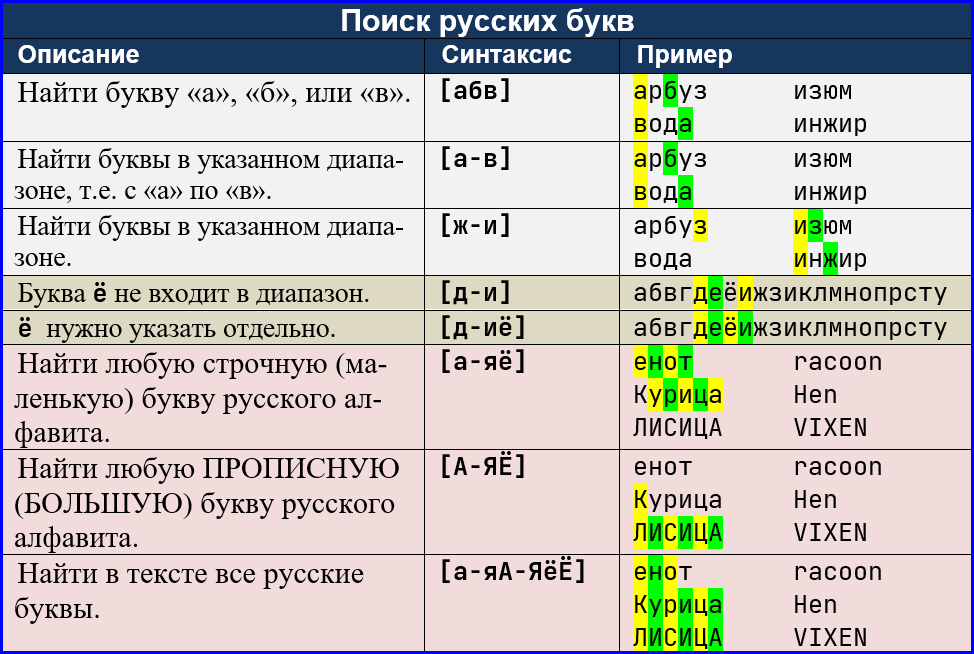  
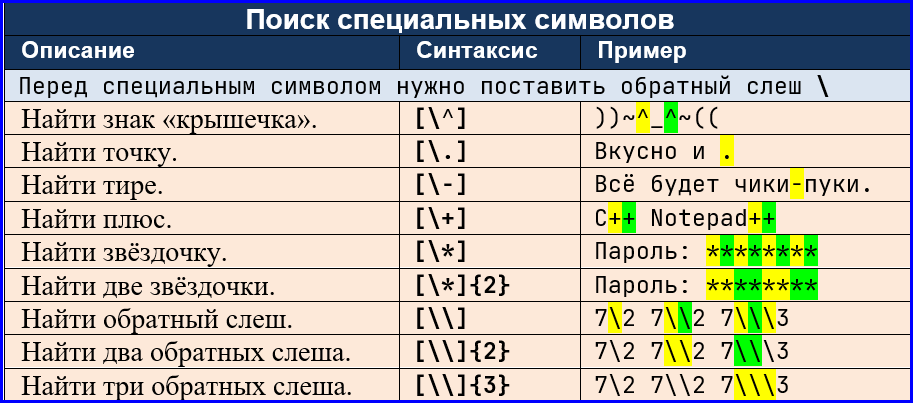  
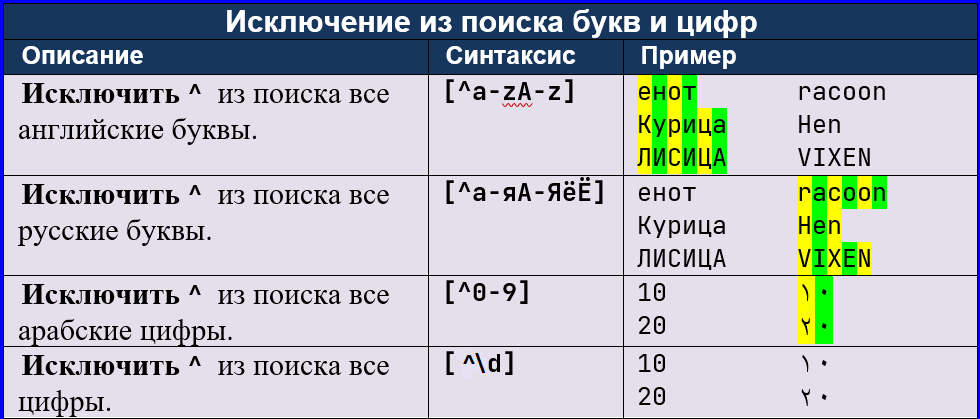

## О заданиях в этом модуле
Этот раздел посвящен изучению синтаксиса, работа проводится только с самими регулярными выражениями. В заданиях требуется присвоить переменной regex регулярное выражение, которое сможет пройти все тесты.  

### ЗАДАНИЕ  
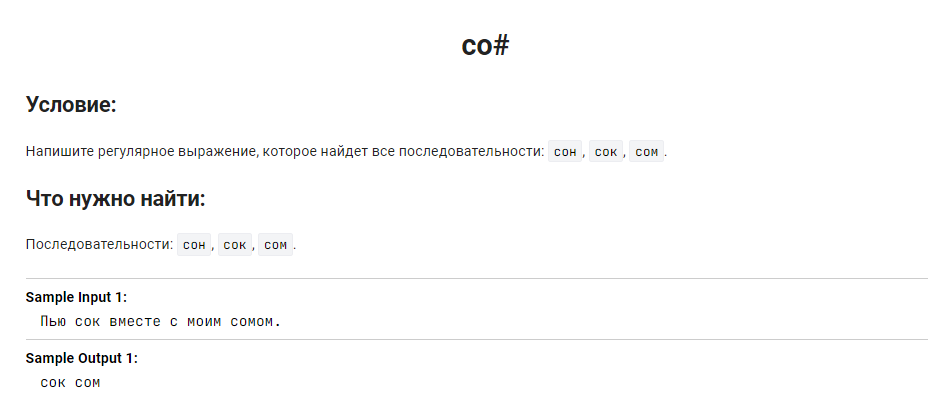

In [89]:
regex = r'со[кнм]'
regex

'со[км]'

### ЗАДАНИЕ  
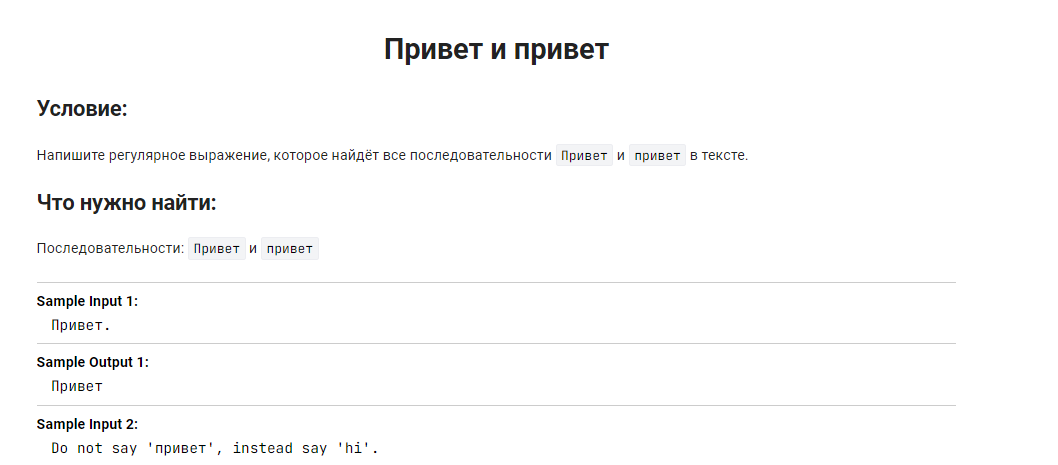

In [ ]:
regex = r'[Пп]ривет'
regex = r'Привет|привет'

### ЗАДАНИЕ  
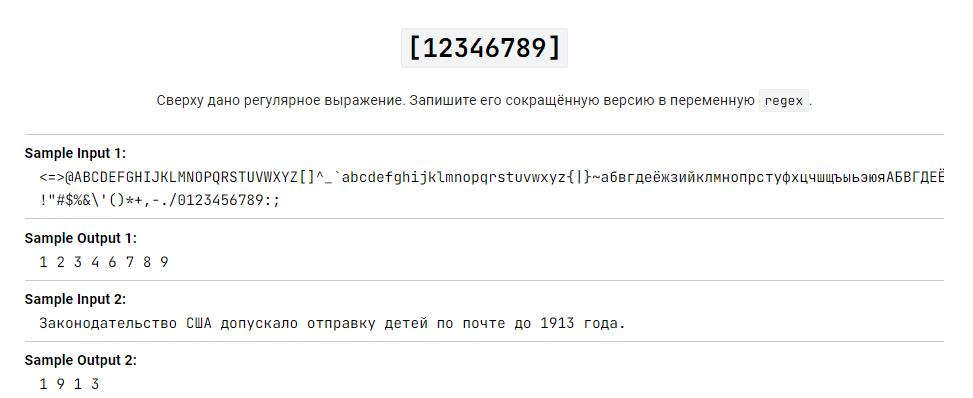

In [2]:
regex = r'[1-46-9]'
regex = r"[^05\D]"
regex = r'[1-4]|[6-9]'

re.findall(regex, 'Законодательсвто США допускало отправку детей по почте до 1913 года')

['1', '9', '1', '3']

### ЗАДАНИЕ  
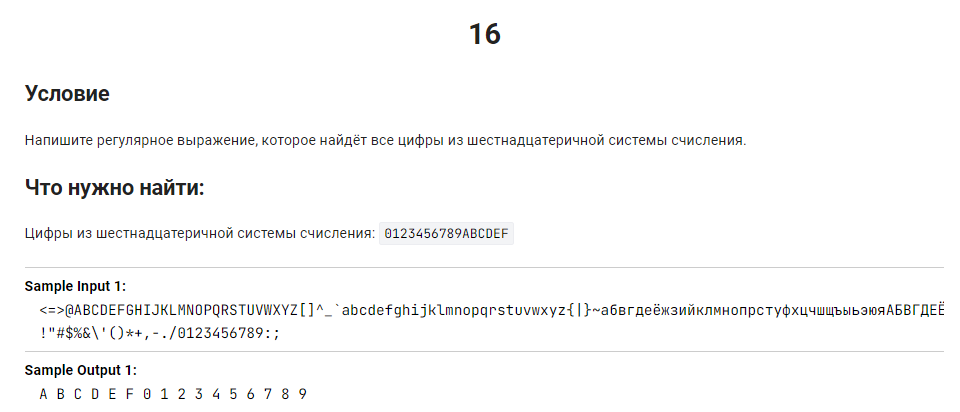

In [ ]:
regex = r'[0-9A-F]'
regex = r'[\dA-F]'
regex = r'[A-F\d]'

### ЗАДАНИЕ  
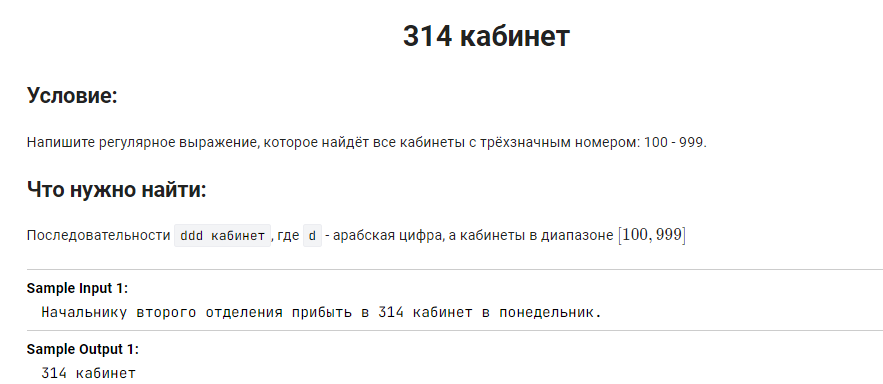

In [5]:
regex = r"\b\d{3}\sкабинет\b"
regex = r"\b[1-9]{3} кабинет\b"
regex = r'[1-9][0-9][0-9]кабинет\b'
regex = r"[1-9]\d{2} кабинет\b"
regex =r'[1-9]\d{2}\sкабинет\b'
regex = r'[1-9]\d\d кабинет\b'

re.findall(regex, 'Начальнику второго отделения прибыть в 314 кабинет в понедельник')

['314 кабинет']

In [3]:
regex = r"\b\d{3} кабинет\b"
re.findall(regex, 'Начальнику второго отделения прибыть в 314 кабинет в понедельник')

['314 кабинет']

### ЗАДАНИЕ  
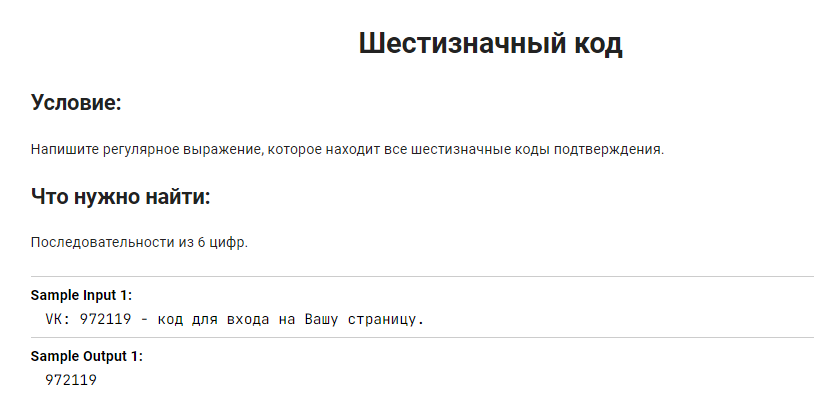

In [6]:
regex = r'\d{6}'
regex = r'[0-9]{6}'
regex = r'[0-9]' * 6
regex = r'[1-9]\d{5}'

print(re.findall(regex, 'VK: 972119 - код для входа на Вашу страницу'))
print(re.findall(r'\b\d{6}\b', 'VK: 972119 - код для входа на Вашу страницу'))


['972119']
['972119']


## 1.2. Шаблоны для поиска и проверки, вариации использования

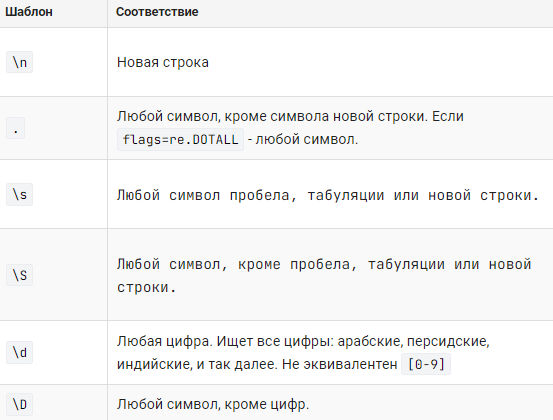  
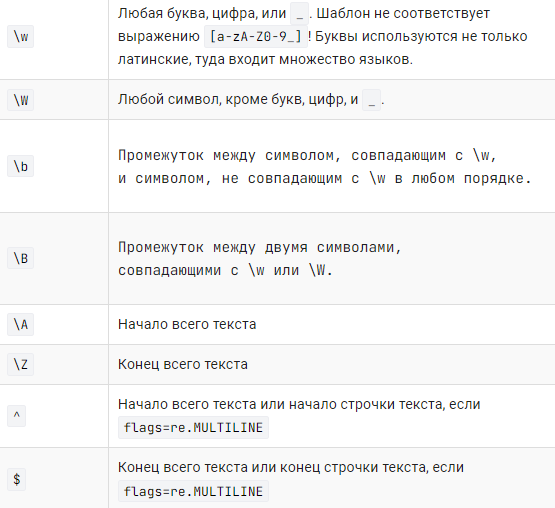    
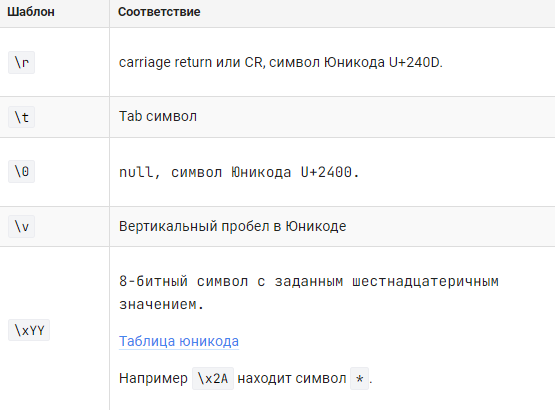  
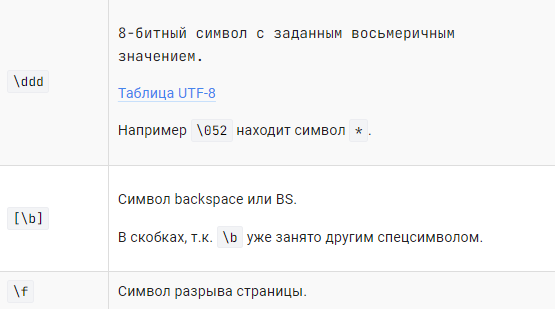

### Вариации использования

### $    

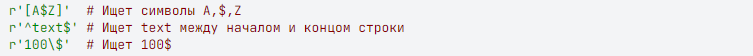    

### ^     

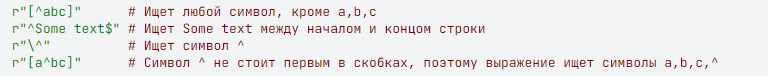    

### .    

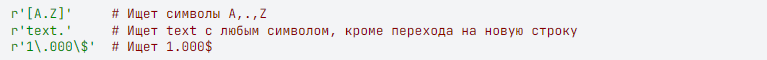    

### -    

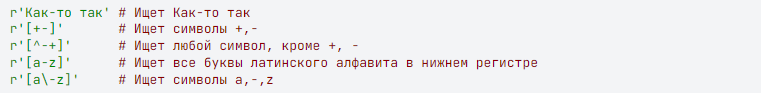    

### []     

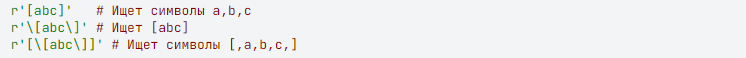     

Не все шаблоны в квадратных скобках используются как текстовые символы:     

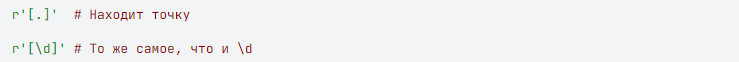

#### - \b  Промежуток между \W\w или \w\W    
#### - \B  Промежуток между \w\w или \W\W

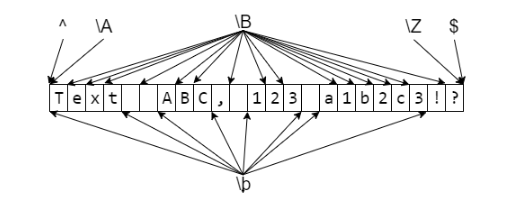    

### \b    

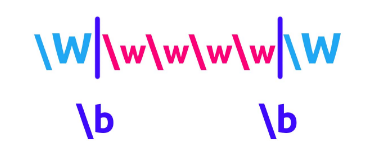   

Регулярное выражение **\b123\b** найдёт **123** в следующих примерах:    
- \#123\%  
-  123  
- 123  
- (123)  
- ^123$  
- -123.    


И пропустит 123 в этих примерах:    
- a123b  
- g123  
- 123g  
- 123_  
- _123  
- 11234

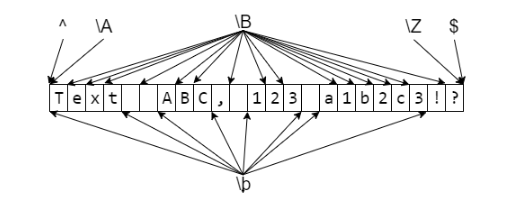     

### \B    

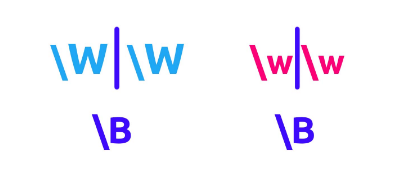

Регулярное выражение **\B123\B** найдёт **123** в следующих примерах:    
- a123b  
- 11234  

И пропустит 123 в этих примерах:    
- \#123\%  
- 123   
- 123   
- (123)  
- ^123$  
- -123.

\b  Промежуток между \W\w или \w\W  
\B  Промежуток между \w\w или \W\W

### ЗАДАНИЕ  
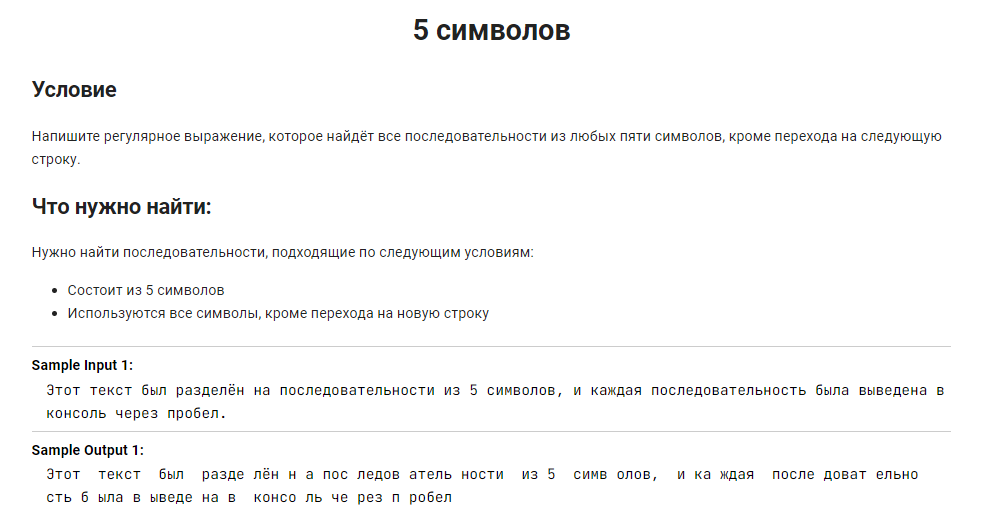

In [6]:
regex = r'.....'
regex = r'.{5}'
regex = r'.' * 5

re.findall(regex, '<=>?@ABCDEwxyz{|}~абвгдеёжз')

['<=>?@', 'ABCDE', 'wxyz{', '|}~аб', 'вгдеё']

### ЗАДАНИЕ  
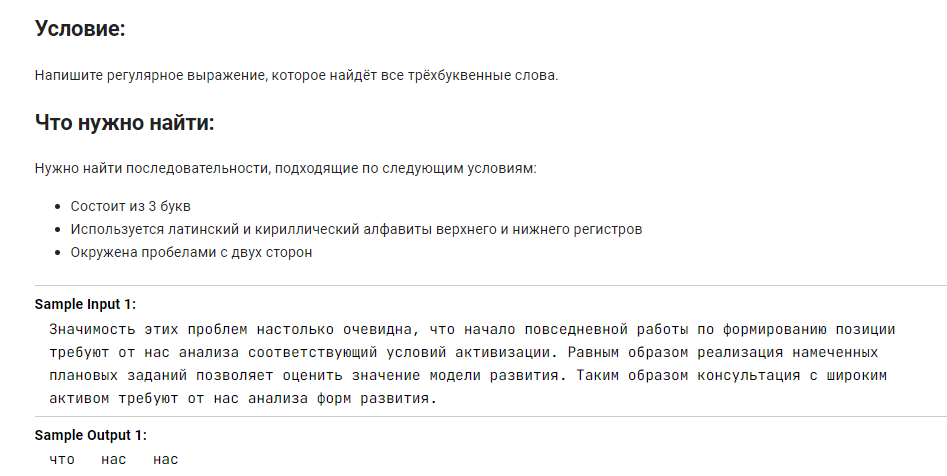

In [8]:
regex = r'\s[a-zа-яA-ZА-ЯЁё]{3}\s'
regex = r'\b[a-zа-яA-ZА-ЯЁё]{3}\b'
regex = r' [^0-9_\W]{3} '
regex = r' [^_\d\W]{3} '

print(re.findall(regex, 'The dog was wet. Now it is dry.')) # Слово окружено пробелом
print(re.findall(r'\b[a-zа-яA-ZА-ЯЁё]{3}\b', 'The dog was wet. Now it is dry.')) # Слово окружено любым знаком 

[' dog ', ' Now ']
['The', 'dog', 'was', 'wet', 'Now', 'dry']


### ЗАДАНИЕ  
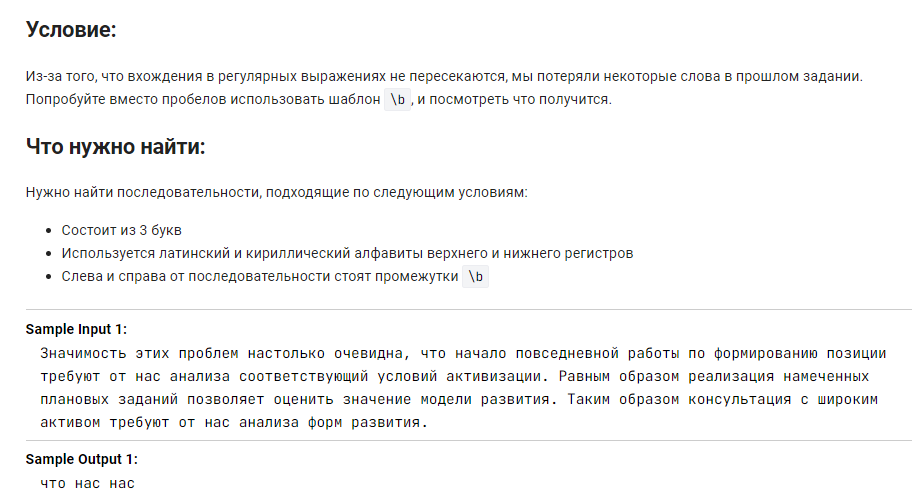

In [100]:
regex = r'\s[a-zа-яA-ZА-ЯЁё]{3}\s'
re.findall(regex, 'The dog was wet. Now it is dry.')

[' dog ', ' Now ']

In [15]:
regex = r'\b[a-zа-яA-ZА-ЯЁё]{3}\b'
print(re.findall(regex, 'The dog was wet. Now it is dry.'))

regex = r"\b[^_\W\d]{3}\b"
print(re.findall(regex, 'The dog was wet. Now it is dry.'))

['The', 'dog', 'was', 'wet', 'Now', 'dry']
['The', 'dog', 'was', 'wet', 'Now', 'dry']


### ЗАДАНИЕ  
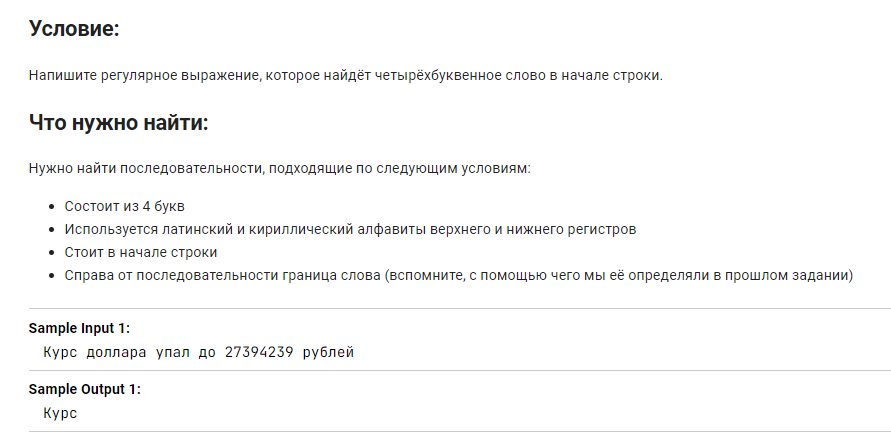

In [106]:
regex = r"^[a-zA-Zа-яА-ЯёЁ]{4}\b"

re.findall(regex, 'Курс доллара упал до 27394239 рублей')

['Курс']

In [108]:
regex = r"^[^\d\W_]{4}\b"

re.findall(regex, 'Курс доллара упал до 27394239 рублей')

['Курс']

### ЗАДАНИЕ  
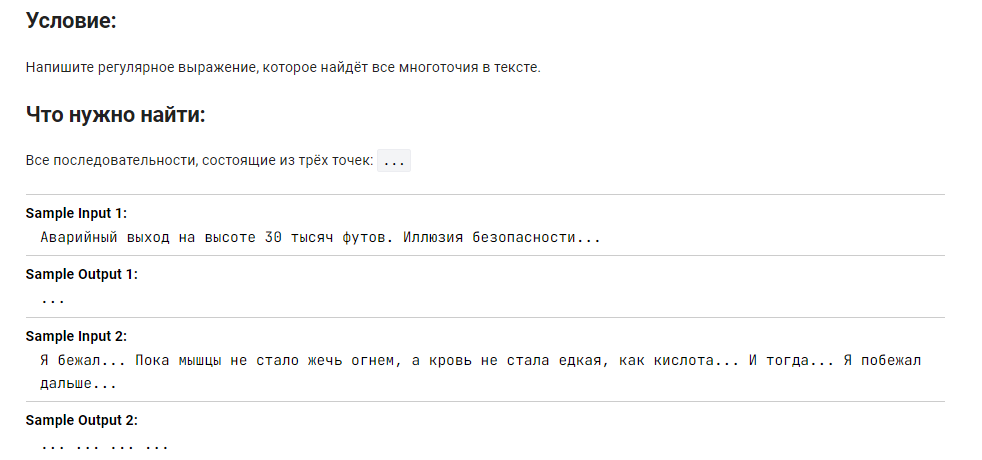

In [2]:
regex = r"[\.]{3}"
print(re.findall(regex, 'Аварийный выход на высоте 30 тысяч футов. Иллюзия безопасности...'))

regex = r"[.]{3}"
print(re.findall(regex, 'Аварийный выход на высоте 30 тысяч футов. Иллюзия безопасности...'))

regex = r'\.{3}'
print(re.findall(regex, 'Аварийный выход на высоте 30 тысяч футов. Иллюзия безопасности...'))

regex = r"\.\.\."
print(re.findall(regex, 'Аварийный выход на высоте 30 тысяч футов. Иллюзия безопасности...'))

regex = re.escape(r"...")
print(re.findall(regex, 'Аварийный выход на высоте 30 тысяч футов. Иллюзия безопасности...'))

['...']
['...']
['...']
['...']
['...']


In [22]:
regex = r"[.]{3}"
re.findall(regex, 'Я бежал... Пока мышцы не стало жечь огнем, а кровь не стала едкая, как кислота... И тогда... Я побежал дальше...')

['...', '...', '...', '...']

## 1.3. Жадные и ленивые квантификаторы

Квантификатор - конструкция, которая позволяет указывать количество повторений     

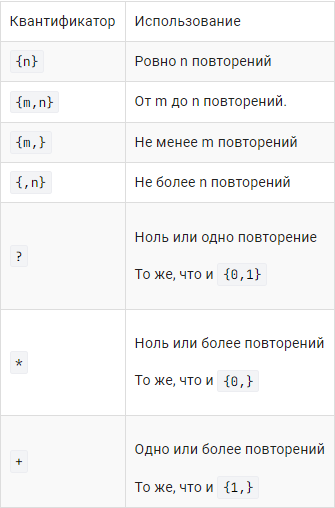   

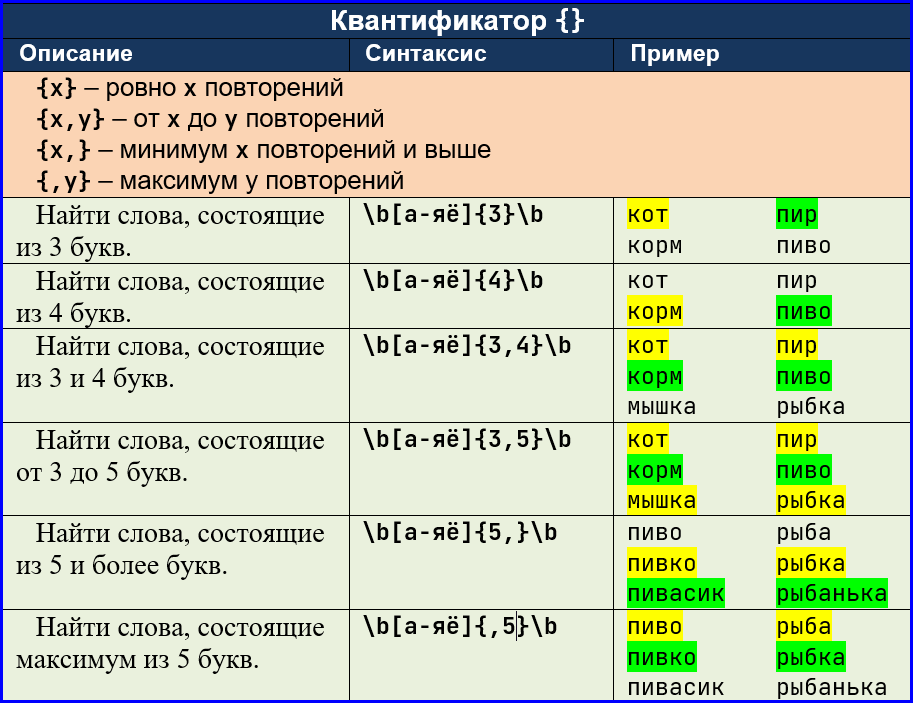    

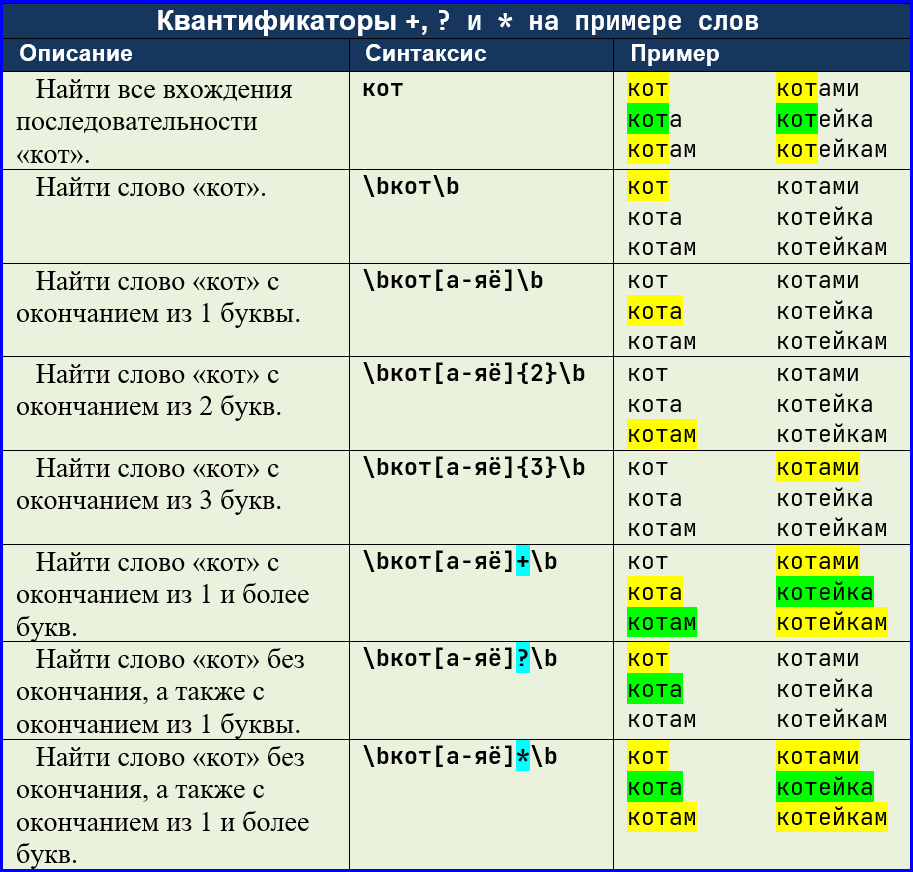    

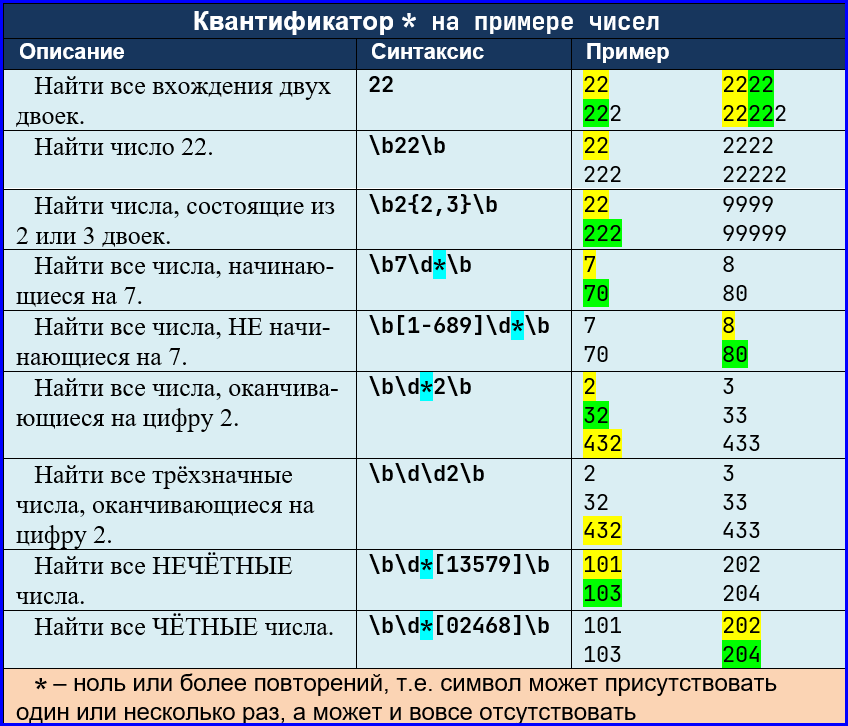    

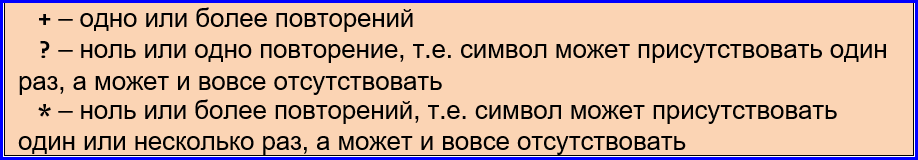  

- В каждом квантификаторе учитываются и начало, и конец отрезка.  
- Каждый квантификатор по умолчанию - жадный. Жадные квантификаторы пытаются захватить как можно больше символов.

### Ленивые квантификаторы

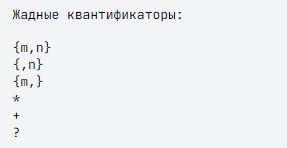

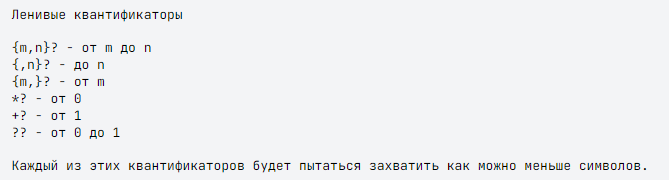

In [29]:
# Работа ЖАДНОГО квантификатора
s = '(1) () (gsf) (321312)'
regex = r'\(.*\)'
print(re.findall(regex, s))
print()

# Работа ЛЕНИВОГО квантификатора  (ДОБАВЛЯЕМ К КВАНТИФИКАТОРУ "?")
regex_lazy = r'\(.*?\)'
print(re.findall(regex_lazy, s))

['(1) () (gsf) (321312)']

['(1)', '()', '(gsf)', '(321312)']


**Ленивый квантификатор помогает найти каждое вхождение по отдельности!** Если после квантификатора поставить знак **?**, то можно его сделать ленивым. Тогда он будет захватывать минимальное количество символов.  

Жадность меняет работу всех квантификаторов, кроме квантификатора {n}. Но это и логично, т. к. в любом случае он будет искать нужную последовательность n раз, независимо от его жадности. Квантификатор {n} будет равносилен квантификатору {n}?, однако, в последнем нет смысла.

### ЗАДАНИЕ  
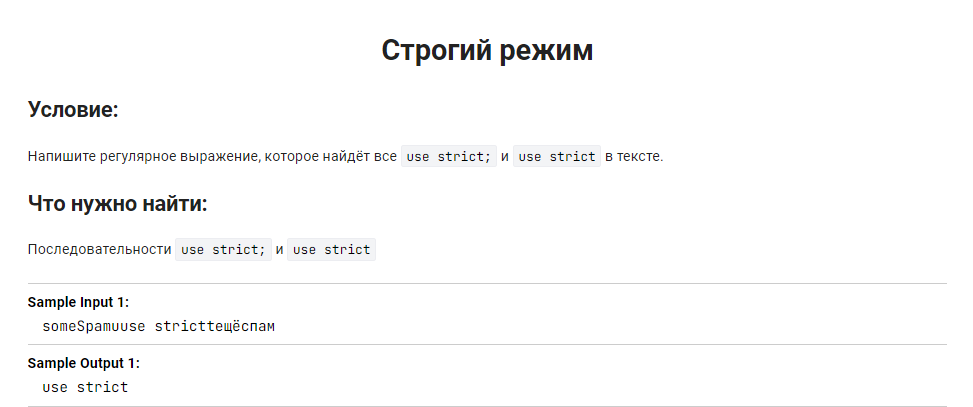

In [23]:
regex = r'use strict;?'
print(re.findall(regex, 'strict;use strict;use'))

regex = r'use strict;{0,1}'
print(re.findall(regex, 'strict;use strict;use'))

['use strict;']
['use strict;']


In [24]:
s = 'use strict'
regex = fr'{s};?'
print(re.findall(regex, 'strict;use strict;use'))

['use strict;']


### ЗАДАНИЕ  
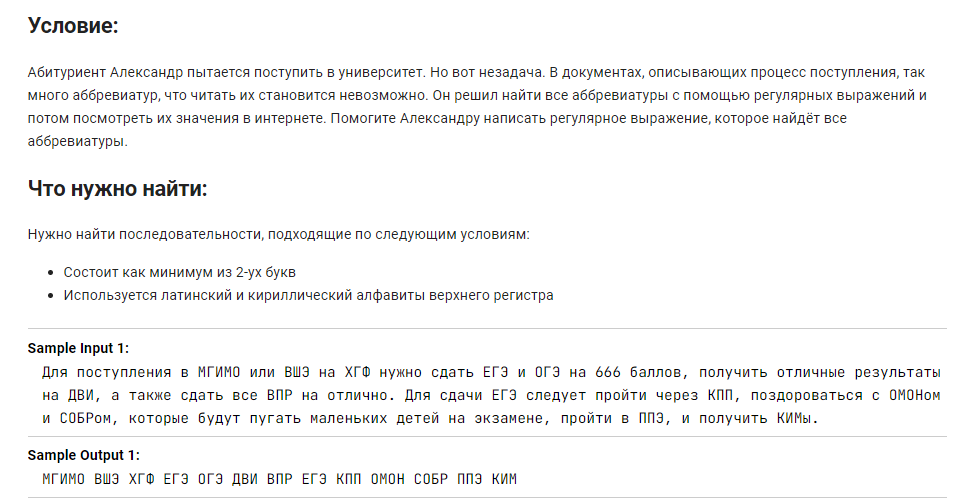

In [24]:
regex = r'\b[А-ЯЁA-Z]{2,}'
print(re.findall(regex, 'Для поступления в МГИМО или ВШЭ на ХГФ нужно сдать ЕГЭ и ОГЭ на 666 баллов, получить отличные результаты на ДВИ, а также сдать все ВПР на отлично. Для сдачи ЕГЭ следует пройти через КПП, поздороваться с ОМОНом и СОБРом, которые будут пугать маленьких детей на экзамене, пройти в ППЭ, и получить КИМы.'))

['МГИМО', 'ВШЭ', 'ХГФ', 'ЕГЭ', 'ОГЭ', 'ДВИ', 'ВПР', 'ЕГЭ', 'КПП', 'ОМОН', 'СОБР', 'ППЭ', 'КИМ']


In [25]:
regex = r'\b[А-ЯЁA-Z]{2,}'
print(re.findall(regex, 'Я считаю, что сначала нужно выбрать БД для проекта, а потом уже продумывать работу с API. Всё будет сделано по ТЗ. Оплата в BTC.'))

['БД', 'API', 'ТЗ', 'BTC']


In [26]:
# Аббревиатуры с окончаниями 
regex = r'\b[А-ЯЁA-Z]{2,}[а-я]*'
print(re.findall(regex, 'Для поступления в МГИМО или ВШЭ на ХГФ нужно сдать ЕГЭ и ОГЭ на 666 баллов, получить отличные результаты на ДВИ, а также сдать все ВПР на отлично. Для сдачи ЕГЭ следует пройти через КПП, поздороваться с ОМОНом и СОБРом, которые будут пугать маленьких детей на экзамене, пройти в ППЭ, и получить КИМы.'))

['МГИМО', 'ВШЭ', 'ХГФ', 'ЕГЭ', 'ОГЭ', 'ДВИ', 'ВПР', 'ЕГЭ', 'КПП', 'ОМОНом', 'СОБРом', 'ППЭ', 'КИМы']


### ЗАДАНИЕ  
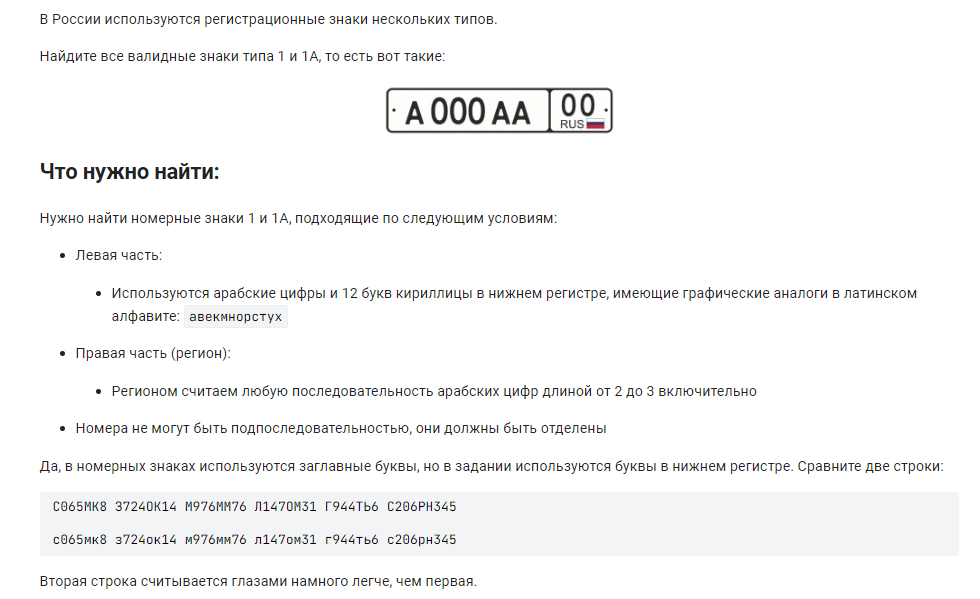

In [66]:
regex = r'\b[авекмнорстух]\d{3}[авекмнорстух]{2}\d{2,3}\b'
print(re.findall(regex, 'а932ву00467 к527мн001 кк527мн001'))

['к527мн001']


In [68]:
regex = r'\b[авекмнорстух][0-9]{3}[авекмнорстух]{2}[0-9]{2,3}\b'
print(re.findall(regex, 'с065мк8 з724ок14 м976мм76 л147ом31 г944ть6 с206рн345'))

['м976мм76', 'с206рн345']


In [78]:
regex = r'[авекмнорстух]\d{3}[авекмнорстух]{2}\d{2}\d?\b'
print(re.findall(regex, 'а932ву00467 к527мн001 кк527мн001'))

['к527мн001', 'к527мн001']


In [75]:
s = "авекмнорстух"
regex = fr"[{s}]\d{{3}}[{s}]{{2}}\d{{2,3}}\b"
print(re.findall(regex, 'а932ву00467 к527мн001 кк527мн001'))

['к527мн001', 'к527мн001']


### ЗАДАНИЕ  
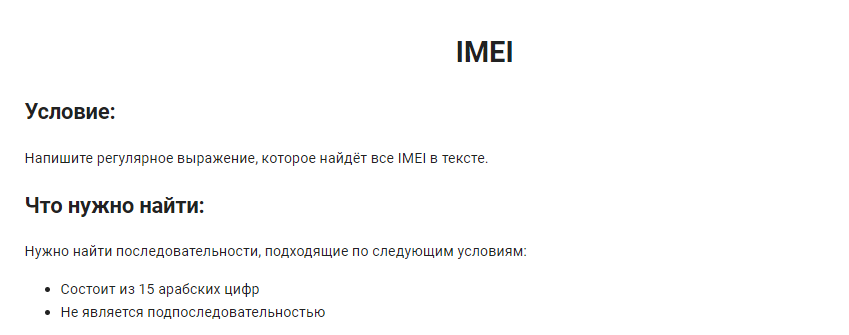  
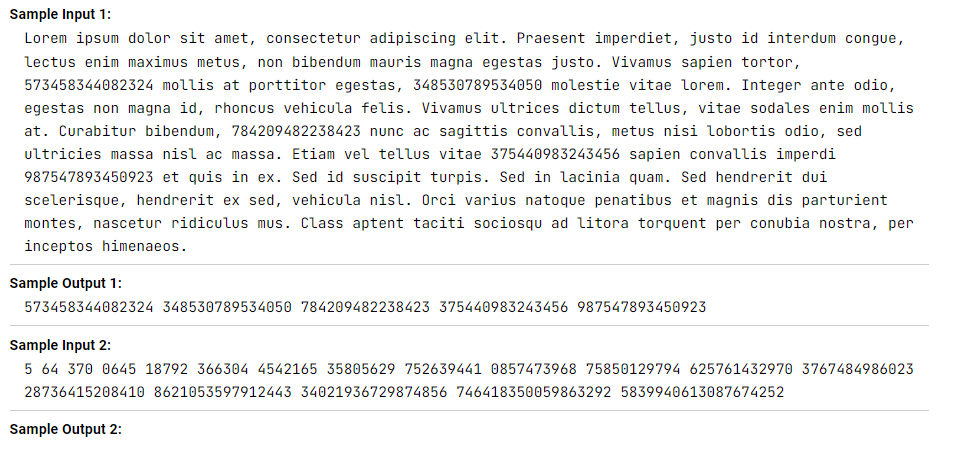

In [30]:
regex = r'\b[0-9]{15}\b'
print(re.findall(regex, 'Lorem ipsum dolor sit amet, consectetur adipiscing elit. Praesent imperdiet, justo id interdum congue, lectus enim maximus metus, non bibendum mauris magna egestas justo. Vivamus sapien tortor, 573458344082324 mollis at porttitor egestas, 348530789534050 molestie vitae lorem. Integer ante odio, egestas non magna id, rhoncus vehicula felis. Vivamus ultrices dictum tellus, vitae sodales enim mollis at. Curabitur bibendum, 784209482238423 nunc ac sagittis convallis, metus nisi lobortis odio, sed ultricies massa nisl ac massa. Etiam vel tellus vitae 375440983243456 sapien convallis imperdi 987547893450923 et quis in ex. Sed id suscipit turpis. Sed in lacinia quam. Sed hendrerit dui scelerisque, hendrerit ex sed, vehicula nisl. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos.'))

regex = r"\b\d{15}\b"
print(re.findall(regex, 'Lorem ipsum dolor sit amet, consectetur adipiscing elit. Praesent imperdiet, justo id interdum congue, lectus enim maximus metus, non bibendum mauris magna egestas justo. Vivamus sapien tortor, 573458344082324 mollis at porttitor egestas, 348530789534050 molestie vitae lorem. Integer ante odio, egestas non magna id, rhoncus vehicula felis. Vivamus ultrices dictum tellus, vitae sodales enim mollis at. Curabitur bibendum, 784209482238423 nunc ac sagittis convallis, metus nisi lobortis odio, sed ultricies massa nisl ac massa. Etiam vel tellus vitae 375440983243456 sapien convallis imperdi 987547893450923 et quis in ex. Sed id suscipit turpis. Sed in lacinia quam. Sed hendrerit dui scelerisque, hendrerit ex sed, vehicula nisl. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos.'))

['573458344082324', '348530789534050', '784209482238423', '375440983243456', '987547893450923']
['573458344082324', '348530789534050', '784209482238423', '375440983243456', '987547893450923']


In [111]:
fingers = ''.join([str(i) for i in range(0, 10)])
regex = fr'\b[{fingers}]{{15}}\b'
print(re.findall(regex, 'Lorem ipsum dolor sit amet, consectetur adipiscing elit. Praesent imperdiet, justo id interdum congue, lectus enim maximus metus, non bibendum mauris magna egestas justo. Vivamus sapien tortor, 573458344082324 mollis at porttitor egestas, 348530789534050 molestie vitae lorem. Integer ante odio, egestas non magna id, rhoncus vehicula felis. Vivamus ultrices dictum tellus, vitae sodales enim mollis at. Curabitur bibendum, 784209482238423 nunc ac sagittis convallis, metus nisi lobortis odio, sed ultricies massa nisl ac massa. Etiam vel tellus vitae 375440983243456 sapien convallis imperdi 987547893450923 et quis in ex. Sed id suscipit turpis. Sed in lacinia quam. Sed hendrerit dui scelerisque, hendrerit ex sed, vehicula nisl. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos.'))

['573458344082324', '348530789534050', '784209482238423', '375440983243456', '987547893450923']


### ЗАДАНИЕ  
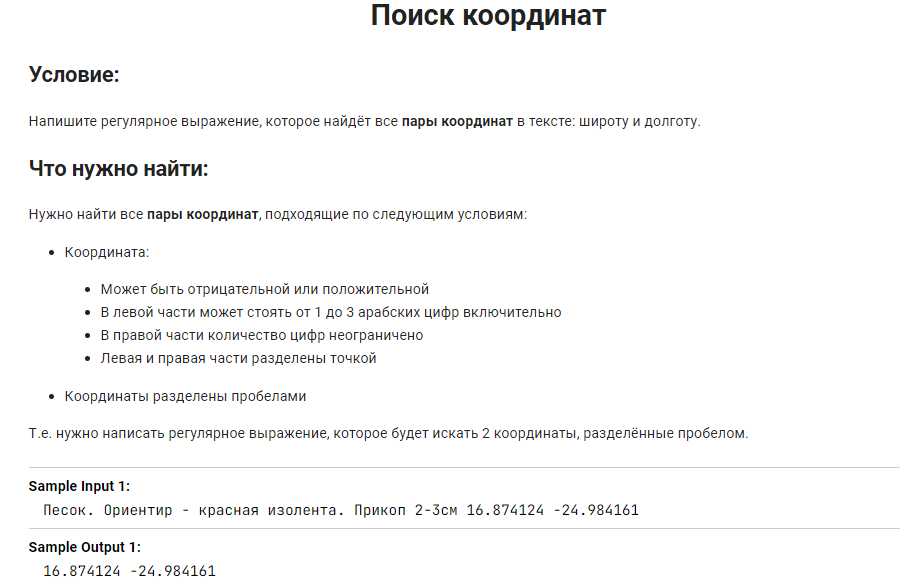

In [116]:
regex = r'\-?\b[0-9]{1,3}\.[0-9]* \-?[0-9]{1,3}\.[0-9]*\b'
print(re.findall(regex, 'Песок. Ориентир - красная изолента. Прикоп 2-3см 16.874124 -24.984161'))

['16.874124 -24.984161']


In [115]:
regex = r'\-?\b[0-9]{1,3}\.[0-9]* \-?[0-9]{1,3}\.[0-9]*\b'
print(re.findall(regex, '0г0, я нашёл интересные места на картах: 54.468693951159835 64.79641683731889, 34.954139 -117.872506, 51.848611 -0.554439'))

['54.468693951159835 64.79641683731889', '34.954139 -117.872506', '51.848611 -0.554439']


In [117]:
regex = r"-?\b\d{1,3}\.\d+"
print(re.findall(regex, '0г0, я нашёл интересные места на картах: 54.468693951159835 64.79641683731889, 34.954139 -117.872506, 51.848611 -0.554439'))

['54.468693951159835', '64.79641683731889', '34.954139', '-117.872506', '51.848611', '-0.554439']


### ЗАДАНИЕ  
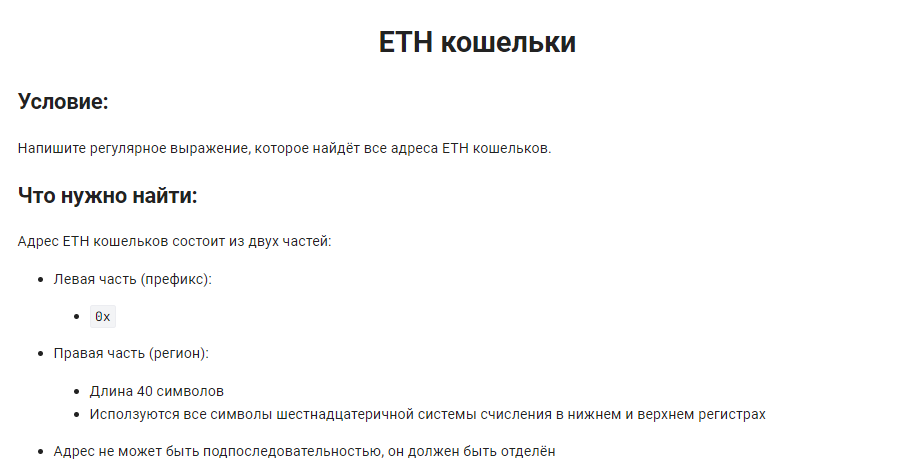  
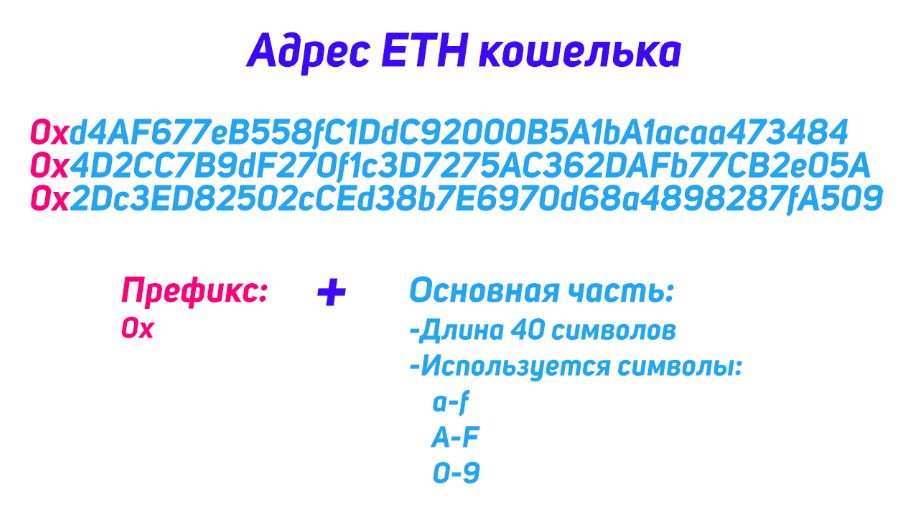  
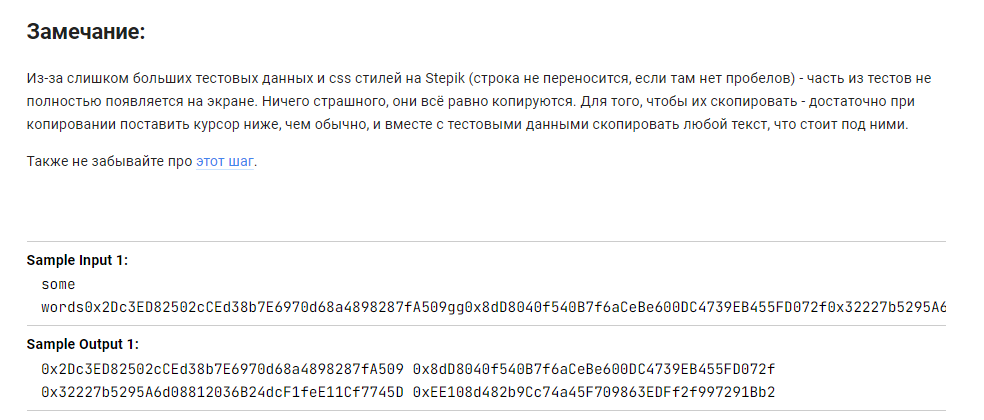

In [10]:
regex = r'0x[a-fA-F0-9]{40}'
regex = r'0x[\dA-Fa-f]{40}''

string = '0x 0xc 0xBF 0x99e 0x65A7 0x89EAe 0x7B65b1 0x41a0083 0x3E9Bb1f4 0x8Ecb661a9 0xA82B4A9fE7 0xe98bCfA2F40 0x767ebdF29CBA 0xE17Cc9E256d7C 0xC72AbDB1947C2c 0x8aEdbB70F9e8Afa 0xCB910dEcC13b7E39 0x21E17b0DF96a407fA 0x45B2b87a9a4c7A6dBf 0xECc6f03A3a7F9C5bD41 0x1C035e0aE9BBa76c23Ce 0x7FC5fdA9FaeaD60fBCed6 0xeF6A18eaafB9E70E4c5C82 0xB76Ba23E1bA85DdeE2F1bfd 0xdDcD5b0B7Ab943C01a8122e3 0xDaBba3A4Fec2C587fB31EAF9f 0xb8ec57DE9CA1Bd04FEAfb29DeC 0xeBFd36a2177bEcECD9fAb91540c 0x3ac5BFe8B7013D8d21e69fcf2EA6 0x8Fed7D6ABaa5c3094A4F0DeC28C9E 0x61E50C1BFB78c7ce4d30D82eFbdf3C 0xfD9BEc7e4DFE0F418a83625fAceC9a7 0x1c28Aef0e4Cdaf537bBbFECc57B3A428 0xB31abeF9581E87d64b2c35Ca0AecC4DAd 0xB81DfBF346Ce400C6Ebc582cb9AEef7d25 0x8A6Ef146c4feCAd2e031BaFC8DD75F35BcE 0x3dFC2dB2e1c8EF56974B0cECfA9AbaD3a84e 0x87b25Fc483af2aB70CA0d4b6FABCcD9DE1536 0x054AfEEdb1B30Faf32C6e762Dcd7C4A81a8BcF 0x8024EbCfB652Ca780541ce3FD69dcDf9eAAE7d1 0x0cE8f1A6F41fb22DD6B55337C9Ce9bcaea7d0AFd '
print(re.findall(regex, string))

['0x0cE8f1A6F41fb22DD6B55337C9Ce9bcaea7d0AFd']


### ЗАДАНИЕ    
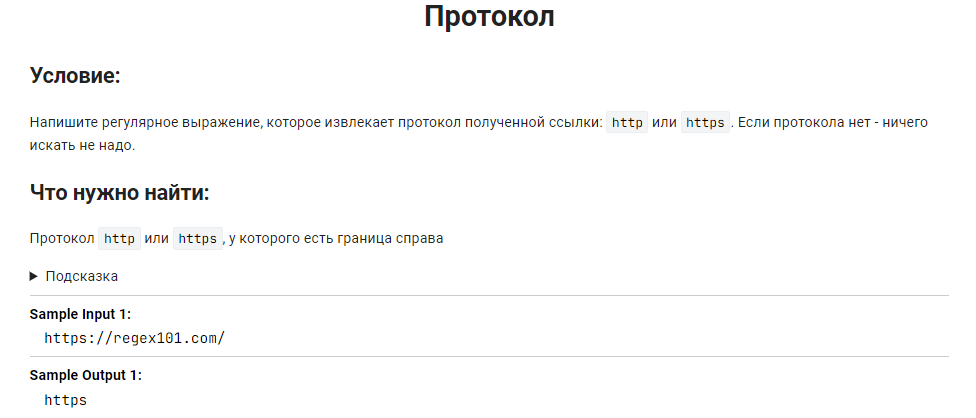

In [12]:
regex = r'\bhttps?\b'
regex = r'\bhttps?(?=://)' # lookahead

regex = r'\bhttp[s]?\b'
regex = r"\bhttp[s]{0,1}\b"
regex = r'\b(https|http)\b'

string = 'http://127.0.0.1:5500/index.html'
print(re.findall(regex, string))

['http']


### ЗАДАНИЕ  
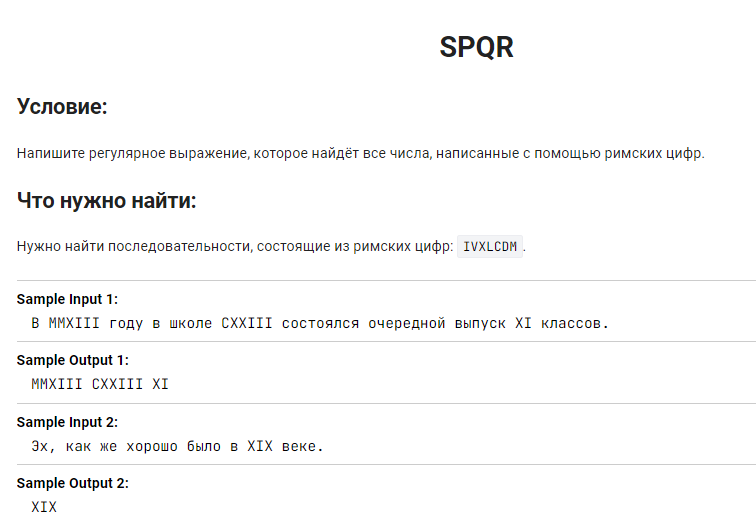

In [6]:
regex = r'\b[IVXLCDM]+\b'
regex = r'\b[IVXLCDM]{1,}\b'

string = 'В MMXIII году в школе CXXIII состоялся очередной выпуск XI классов.'
print(re.findall(regex, string))

['MMXIII', 'CXXIII', 'XI']


In [7]:
r = 'IVXLCDM'
regex = fr'[{r}]{"+"}'

string = 'В MMXIII году в школе CXXIII состоялся очередной выпуск XI классов.'
print(re.findall(regex, string))

['MMXIII', 'CXXIII', 'XI']


### ЗАДАНИЕ  
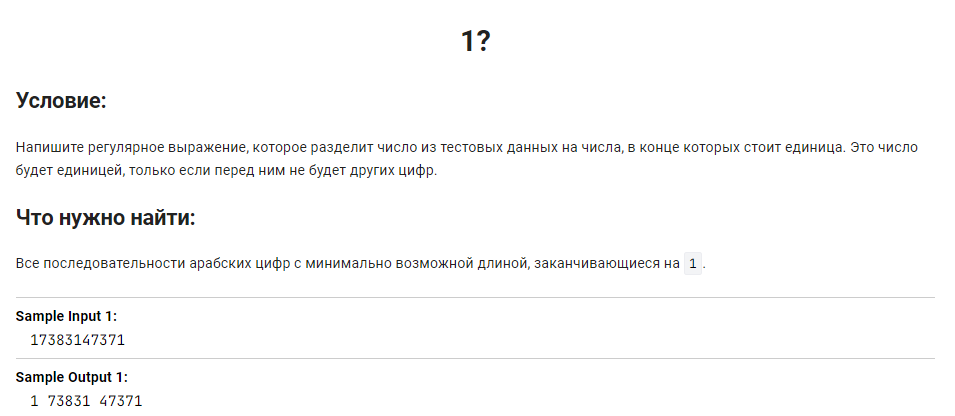

In [120]:
regex = r'\d*?1'
print(re.findall(regex, '17383147371'))

['1', '73831', '47371']


In [121]:
regex = r'\d*?1'
print(re.findall(regex, '1273129831982391293127903790127309120-381023-12037128903701270948107934709812094712098341'))

['1', '2731', '29831', '982391', '2931', '279037901', '273091', '381', '1', '20371', '28903701', '2709481', '0793470981', '209471', '2098341']


In [83]:
# ЖАДНЫЙ КВАНТИФ-Р:
regex = r'\d*1'
print(re.findall(regex, '17383147371'))

['17383147371']


### ЗАДАНИЕ  
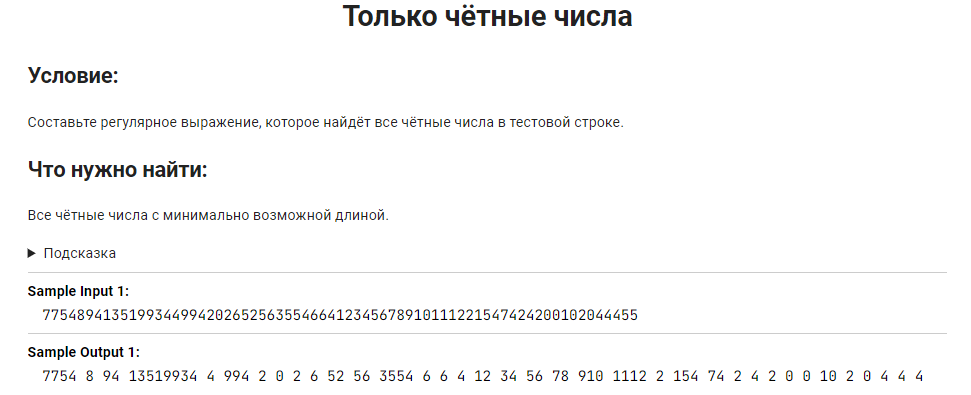

In [122]:
regex = r'\d*?[02468]'
print(re.findall(regex, '775489413519934499420265256355466412345678910111221547424200102044455'))

['7754', '8', '94', '13519934', '4', '994', '2', '0', '2', '6', '52', '56', '3554', '6', '6', '4', '12', '34', '56', '78', '910', '1112', '2', '154', '74', '2', '4', '2', '0', '0', '10', '2', '0', '4', '4', '4']


### ЗАДНИЕ  
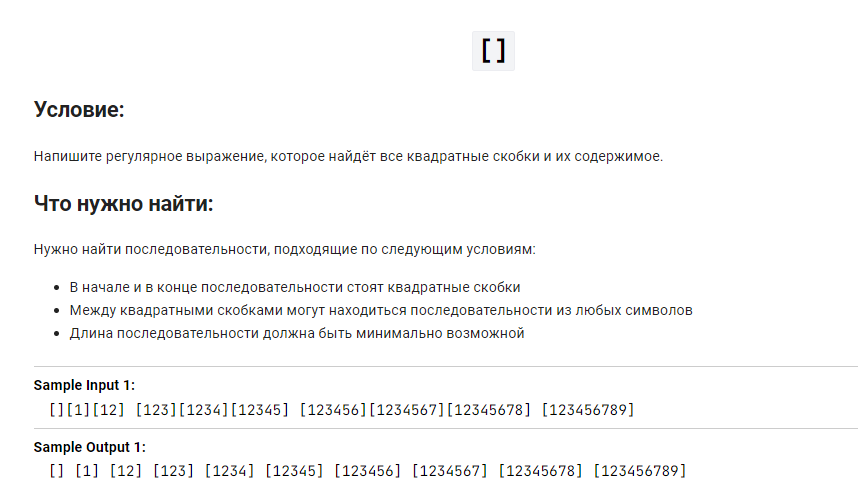

In [124]:
regex = r'\[.*?\]'
print(re.findall(regex, '[][1][12] [123][1234][12345] [123456][1234567][12345678] [123456789]'))

['[]', '[1]', '[12]', '[123]', '[1234]', '[12345]', '[123456]', '[1234567]', '[12345678]', '[123456789]']


### ЗАДАНИЕ   
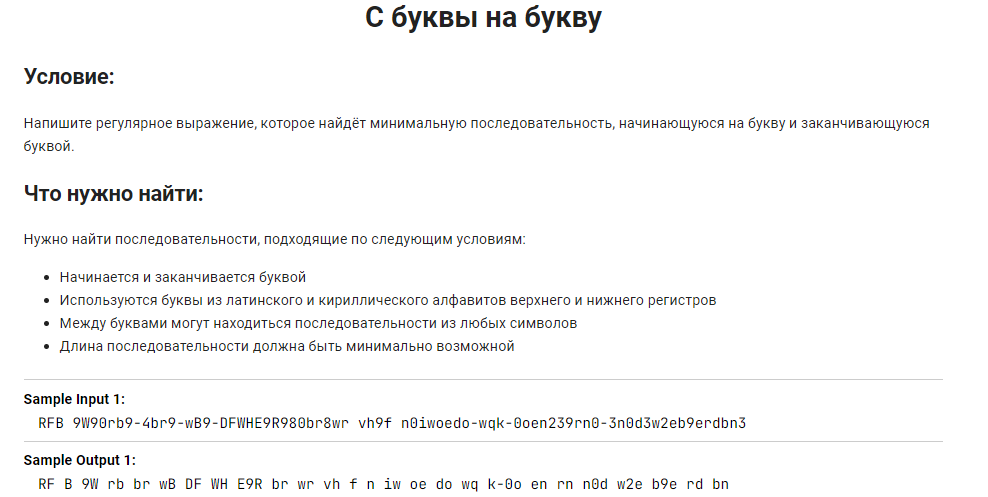

In [36]:
regex = r'[^_\d\W].*?[^_\d\W]'
regex = r'[a-zA-Zа-яА-ЯёЁ]+?.*?[a-zA-Zа-яА-ЯёЁ]+?'
regex = r"(?i)[a-zа-яё].*?[a-zа-яё]"

r = r'(?i)[a-zа-яё]'
regex = fr'{r}.*?{r}'


r = r"[a-zA-Zа-яА-ЯёЁ]"
regex = fr"{r}.*?{r}"


string =  'RFB 9W90rb9-4br9-wB9-DFWHE9R980br8wr vh9f n0iwoedo-wqk-0oen239rn0-3n0d3w2eb9erdbn3'
print(re.findall(regex, string))

['RF', 'B 9W', 'rb', 'br', 'wB', 'DF', 'WH', 'E9R', 'br', 'wr', 'vh', 'f n', 'iw', 'oe', 'do', 'wq', 'k-0o', 'en', 'rn', 'n0d', 'w2e', 'b9e', 'rd', 'bn']


### ЗАДАНИЕ  
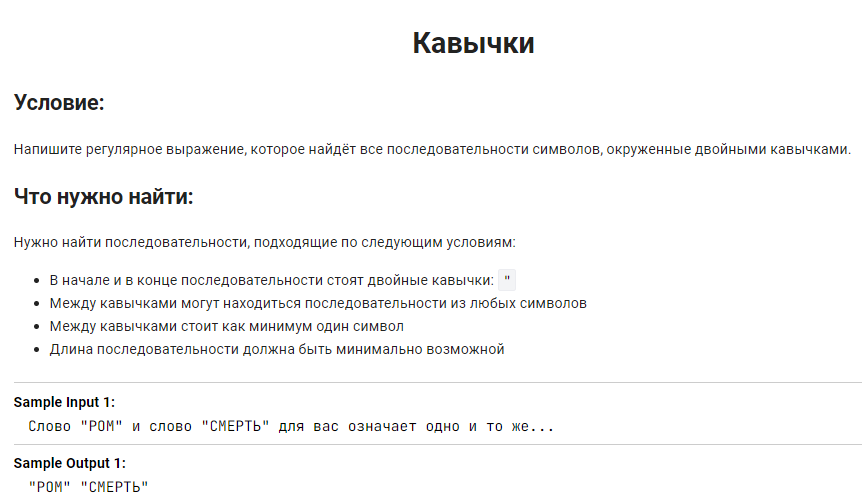

In [13]:
regex = r'"{1}.+?"{1}'

string =  'Слово "РОМ" и слово "СМЕРТЬ" для вас означает одно и то же...'
print(re.findall(regex, string))

['"РОМ"', '"СМЕРТЬ"']


## 1.4. Группирующие скобки, именованные и нумерованные группы, ссылки

(regex) - Обыкновенная скобочная группа. Захватывает символы, о которых можно будет получить более подробную информацию.      
(?P< name >regex) - Обычная скобочная группа, но вместе с номером ей будет присвоено имя name.      
(?P< name >regex)(?P=name) - Скобочная группа с именем позволяет к ней обращатся и искать такой же текст, который она захватила.

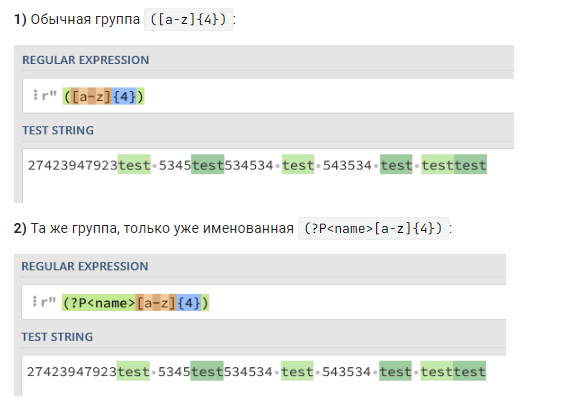        

После указания name можно получить содержмое группы не только по номеру, но и по имени  

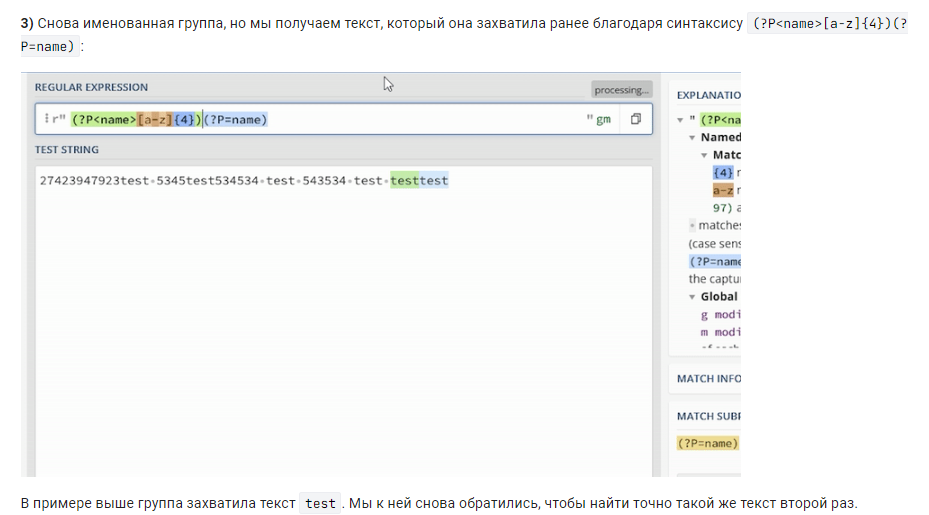

### Ссылки на нумерованные группы

Ссылаться можно не только на именованные группы, но и на обычные. Для этого достаточно использовать синтаксис \1, \2, ...   
Цифра после слеша - номер группы, к которой мы обращаемся. Повторяем регулярное выражение, но уже без именованных групп:     

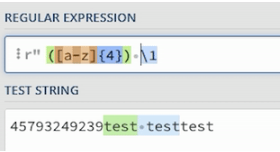

### ЗАДАНИЕ  
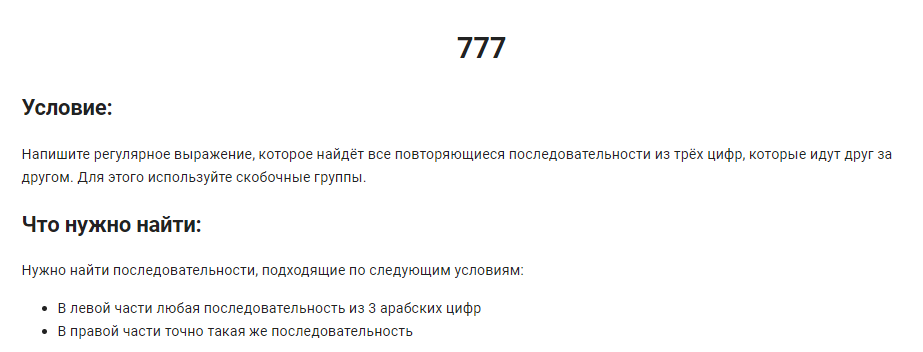

In [60]:
regex = r'(?P<name>\d{3})(?P=name)'
print(re.findall(regex, '534535345377777753453'))

['777']


In [61]:
regex = r'(\d{3})'
print(re.findall(regex, '534535345377777753453'))

['534', '535', '345', '377', '777', '753', '453']


In [62]:
regex = r'\d{3}'
print(re.findall(regex, '534535345377777753453'))

['534', '535', '345', '377', '777', '753', '453']


In [151]:
regex = r'(?P<name>\d{3})(?P=name)'
print(re.findall(regex, '534535345377777777777753453'))

['777', '777']


In [150]:
regex = r'(?P<name>\d{3})'
print(re.findall(regex, '534535345377777753453'))

['534', '535', '345', '377', '777', '753', '453']


In [149]:
regex = r'(\d\d\d)\1+?'
print(re.findall(regex, '534535345377777753453'))

['777']


### ЗАДАНИЕ  
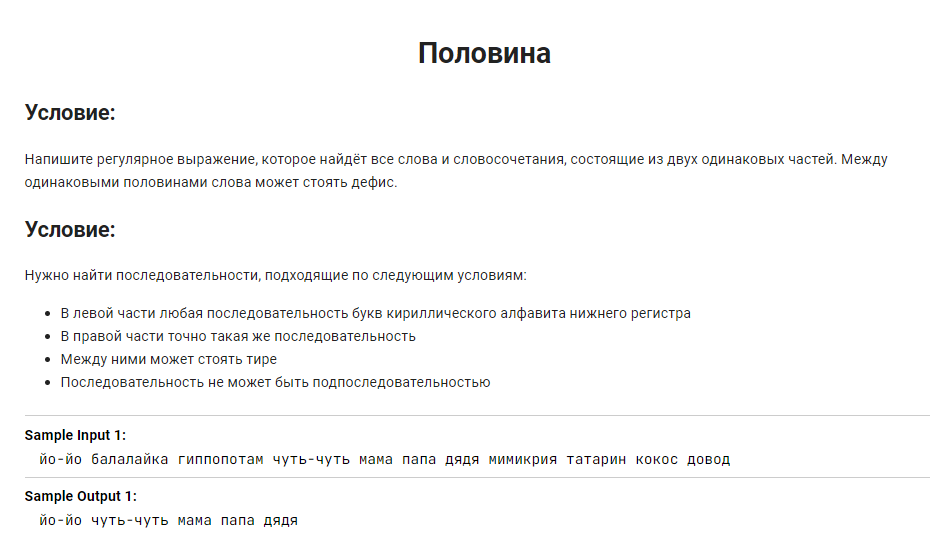

In [311]:
regex = r'\b(?P<name>[а-яёА-ЯЁ]+)[-]?(?P=name)\b'
print(re.findall(regex, 'йо-йо балалайка гиппопотам чуть-чуть мама папа дядя мимикрия татарин кокос довод'))

['йо', 'чуть', 'ма', 'па', 'дя']


### ЗАДАНИЕ  
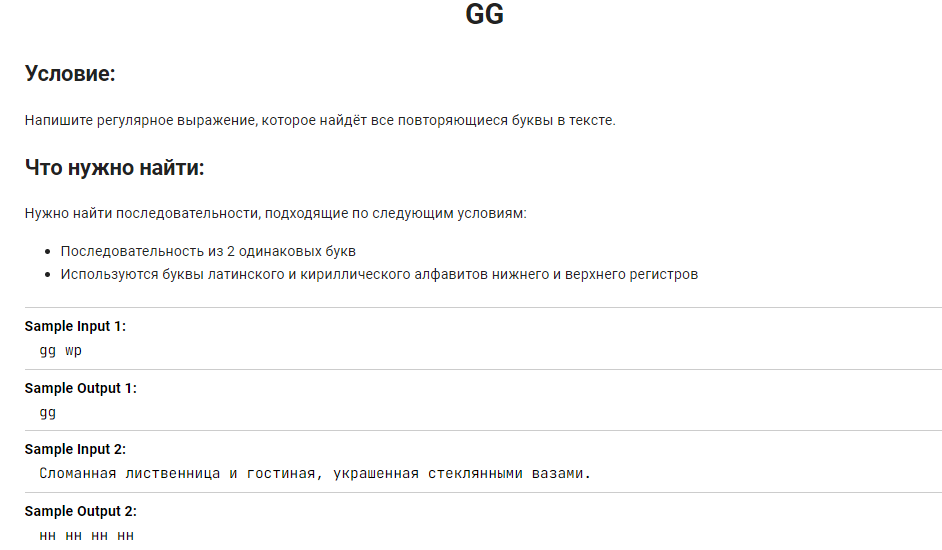

In [100]:
regex = r'(?P<name>[а-яёА-ЯЁa-zA-Z])(?P=name)'
print(re.findall(regex, 'Сломанная лиственница и гостиная, украшенная стеклянными вазами. '))

['н', 'н', 'н', 'н']


In [103]:
regex = r'(?P<name>[а-яёА-ЯЁa-zA-Z])\1'
print(re.findall(regex, 'Сломанная лиственница и гостиная, украшенная стеклянными вазами. '))

['н', 'н', 'н', 'н']


In [63]:
regex = r'([а-яёА-ЯЁa-zA-Z])\1'
print(re.findall(regex, 'Сломанная лиственница и гостиная, украшенная стеклянными вазами. '))

['н', 'н', 'н', 'н']


### ЗАДАНИЕ  
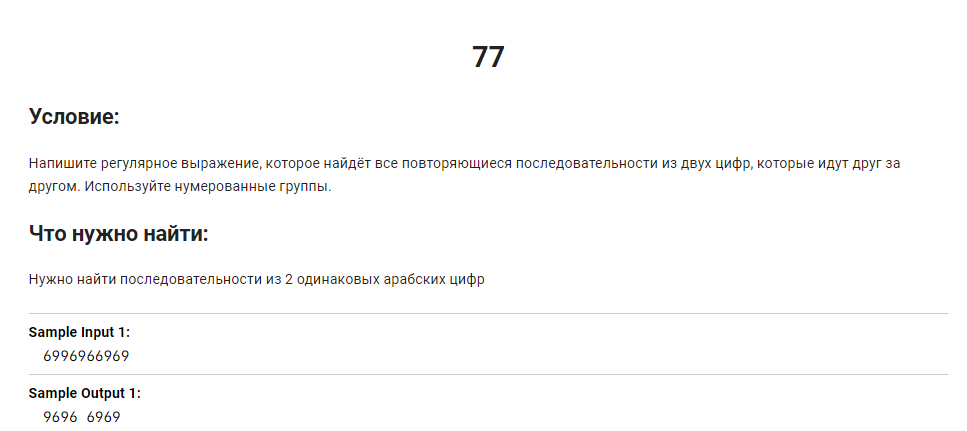

In [326]:
regex = r'(\d{2})\1'
print(re.findall(regex, '534535345377777753453'))

['53', '77']


### ЗАДАНИЕ  
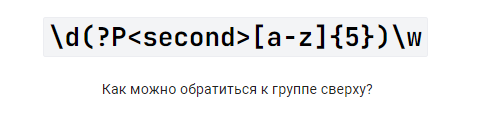

In [ ]:
\1
(?P=second)

### Условие (?(n)yes|no)

In [ ]:
regex = r"(a)?(?(1)b|c)"

# Группа (a)? ищет букву a. К группе применён квантификатор ?, т.к. этой буквы может не быть в тексте
# Если в первой группе нашлась буква a, то условие (?(1)b|c) ищет букву b
# Если первая группа ничего не нашла, то условие ищет букву c

# В данном примере регулярное выражение найдёт все ab и c в тексте  

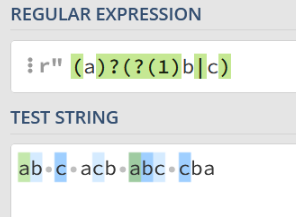

In [ ]:
regex = r"^(\[)?\d(?(1)\]|)$" # Выражение для поиска цифры в скобках или без скобок

# Группа (\[)? ищет первую скобку. К группе применён квантификатор ?, т.к. скобки может и не быть
# Условие (?(1)\]|) ищет правую скобку, если в первой группе найдена левая скобка.
# Если первая группа ничего не нашла, то условие ничего не ищет.

# Найдёт 1 и [2]
# Проигнорирует 3] и [4

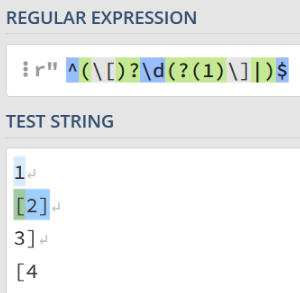

Чтобы условие корректно работало, часто приходится добавлять дополнительные проверки на границу слова, конец/начало строки, или lookbehind с lookahead

### ЗАДАНИЕ  
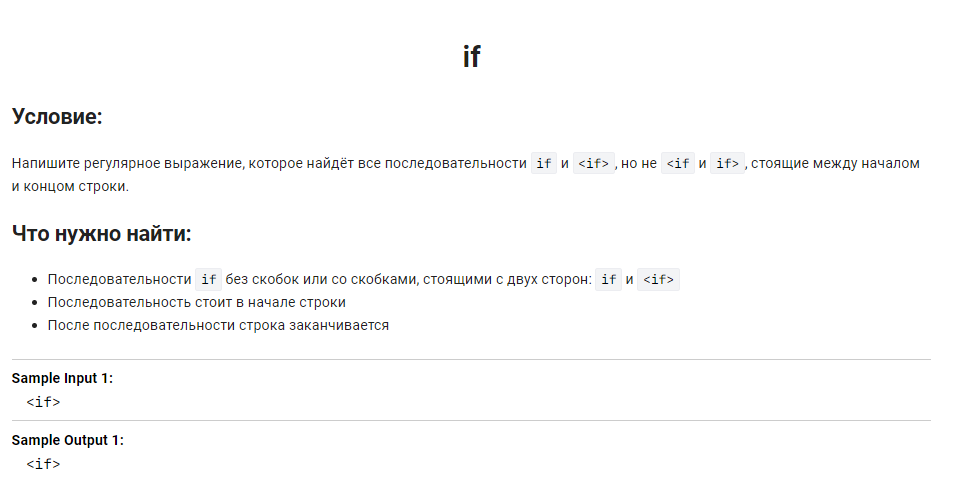

In [16]:
# Знак ^ - начало строки (также \A), знак $ - конец строки (также \Z)
regex_1 = r'^(<)?(?(1)if>|if?)$'
regex_2 = r"^(<)?if(?(1)>|)$"
regex_3 = r"^(if|<if>)$"

print(re.findall(regex_3, '<if>'))

['<if>']


## 1.5. Скобочные выражения.  Non-capturing group, Comment group  
### Comment group  

(?#) - скобочное выражение, позволяющее написать комментарий в регулярном выражении:

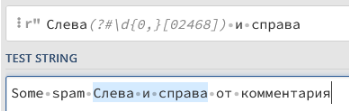

### Non-capturing group

(?:) - скобочное выражение, которое группирует регулярное выражение, но не захватывает в его группу. Non-capturing group, т.е. группа без захвата. Non-capturing group можно использовать, например, чтобы применять квантификаторы сразу к нескольким символам:  
- (?:\d.){2} равносильно \d.\d.

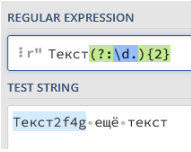    

Если использовать обычные группирующие скобки, они захватят эти символы отдельно:     

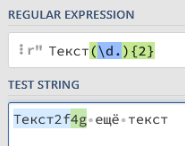

Группы имеет смысл использовать только тогда, когда мы к ним обращаемся или работаем с их данными. Во всех остальных случаях лучше использовать Non-capturing group.

In [10]:
regex = r'Текст(?:\d.){2}'
print(re.findall(regex, 'Текст2f4g еще текст'))

['Текст2f4g']


### Lookahead и Lookbehind

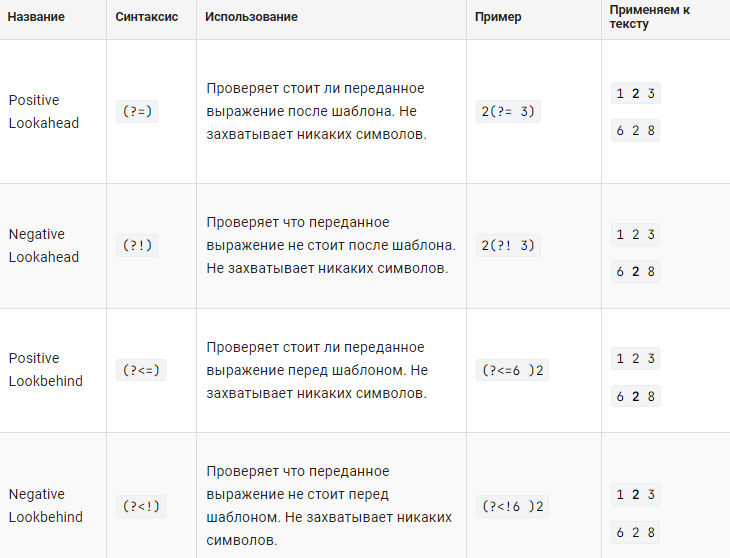

Пример: нужно найти слово test, окружённое двумя цифрами, без захвата самих цифр. Для этого можно использовать скобочные выражения. Регулярное выражение, которое ищет слово test среди двух цифр, но не захватывает их: (?<=\d)test(?=\d).

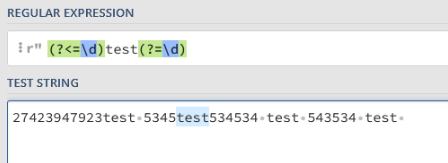    

Можно ставить несколько lookahead или lookbehind друг за другом.   
Например, в следующем регулярном выражении выполняется сразу 2 условия:     

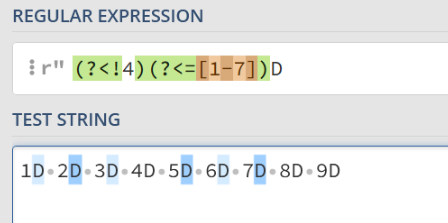

### Ограничение Lookbehind

Все выражения в lookbehind должны быть фиксированной длины, иначе мы получим ошибку *re.error: look-behind requires fixed-width pattern.*   

Движок регулярных выражений в Python не может работать с выражениями неопределённой длины в Lookbehind из-за технических особенностей. Такая особенность есть только у Lookbehind. Lookahead позволяет использовать внутри выражения неопределённой длины.  

In [ ]:
# Вызовут ошибку:
r'(?<=test{0,})regex'    # Длина вхождений выражений в Lookbehind может быть разной. Поэтому появится ошибка
r'(?<=g?)regex'
r'(?<!Python+)regex'

# Ошибки не будет:
r'(?<=test)regex'        # Длина вхождений выражений в Lookbehind фиксированная
r'(?<=g{21})regex'       # Всё выполнится без ошибок
r'(?<!Pytho[mn])regex'

### ЗАДАНИЕ  
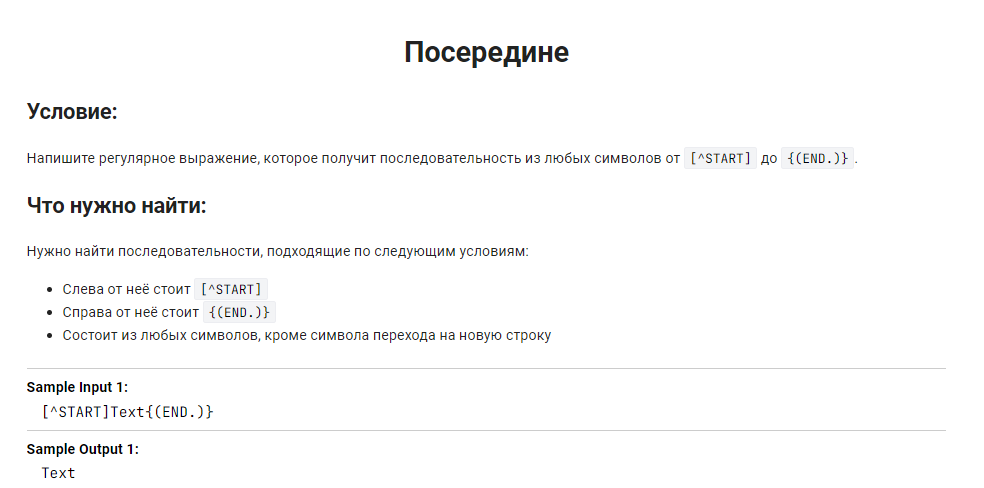

In [145]:
regex = r'(?<=\[\^START\]).*(?=\{\(END\.\)\})'
print(re.findall(regex, '[^START]Text{(END.)}'))

['Text']


### ЗДАНИЕ  
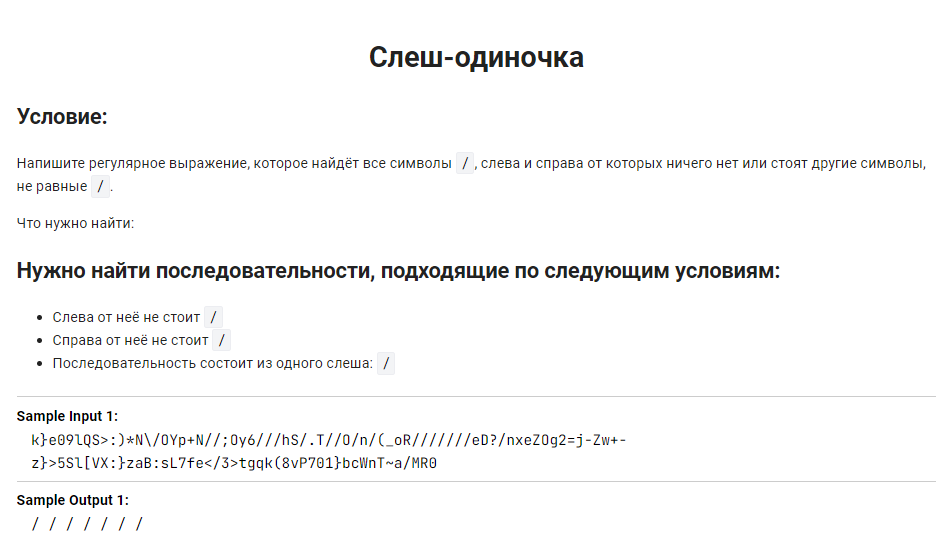

In [26]:
regex = r'(?<!/)/{1}(?!/)'
print(re.findall(regex, 'k}e09lQS>:)*N\/OYp+N//;Oy6///hS/.T//O/n/(_oR///////eD?/nxeZOg2=j-Zw+-z}>5Sl[VX:}zaB:sL7fe</3>tgqk(8vP701}bcWnT~a/MR0'))

['/', '/', '/', '/', '/', '/', '/']


In [27]:
regex =  r'(?<=.)(?<!/)/(?=.)(?!/)'
print(re.findall(regex, 'k}e09lQS>:)*N\/OYp+N//;Oy6///hS/.T//O/n/(_oR///////eD?/nxeZOg2=j-Zw+-z}>5Sl[VX:}zaB:sL7fe</3>tgqk(8vP701}bcWnT~a/MR0'))

['/', '/', '/', '/', '/', '/', '/']


In [28]:
regex = r'(?<=[^/])/(?=[^/])'
print(re.findall(regex, 'k}e09lQS>:)*N\/OYp+N//;Oy6///hS/.T//O/n/(_oR///////eD?/nxeZOg2=j-Zw+-z}>5Sl[VX:}zaB:sL7fe</3>tgqk(8vP701}bcWnT~a/MR0'))

['/', '/', '/', '/', '/', '/', '/']


### ЗАДАНИЕ  
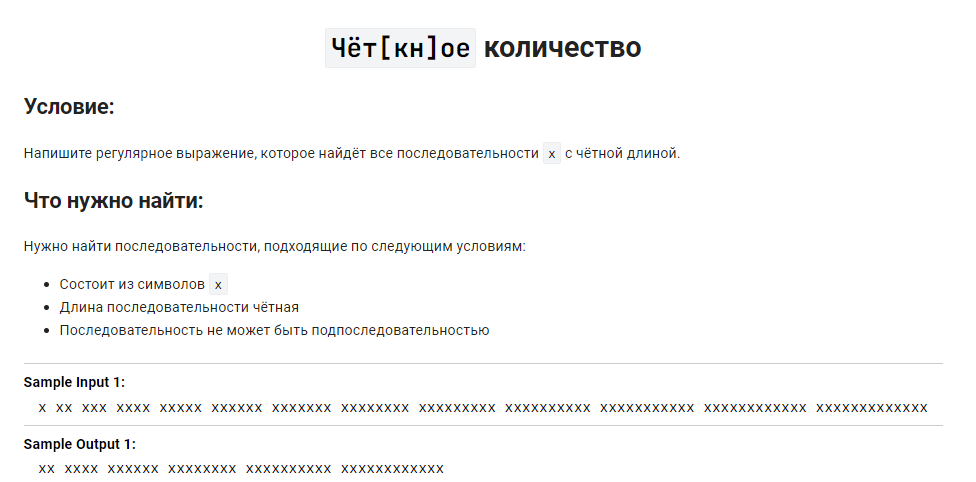

In [47]:
regex = r'(?<!x)(?:xx)+(?!x)'
print(re.findall(regex, 'x xx xxx xxxx xxxxx xxxxxx xxxxxxx xxxxxxxx xxxxxxxxx xxxxxxxxxx xxxxxxxxxxx xxxxxxxxxxxx xxxxxxxxxxxxx'))

['xx', 'xxxx', 'xxxxxx', 'xxxxxxxx', 'xxxxxxxxxx', 'xxxxxxxxxxxx']


In [32]:
# Яркий пример где использовать регулярки строго НЕ рекомендуется
a = 'x xx xxx xxxx xxxxx xxxxxx xxxxxxx xxxxxxxx xxxxxxxxx xxxxxxxxxx xxxxxxxxxxx xxxxxxxxxxxx xxxxxxxxxxxxx'
print([i for i in a.split() if not len(i) % 2])

['xx', 'xxxx', 'xxxxxx', 'xxxxxxxx', 'xxxxxxxxxx', 'xxxxxxxxxxxx']


### ЗАДАНИЕ  
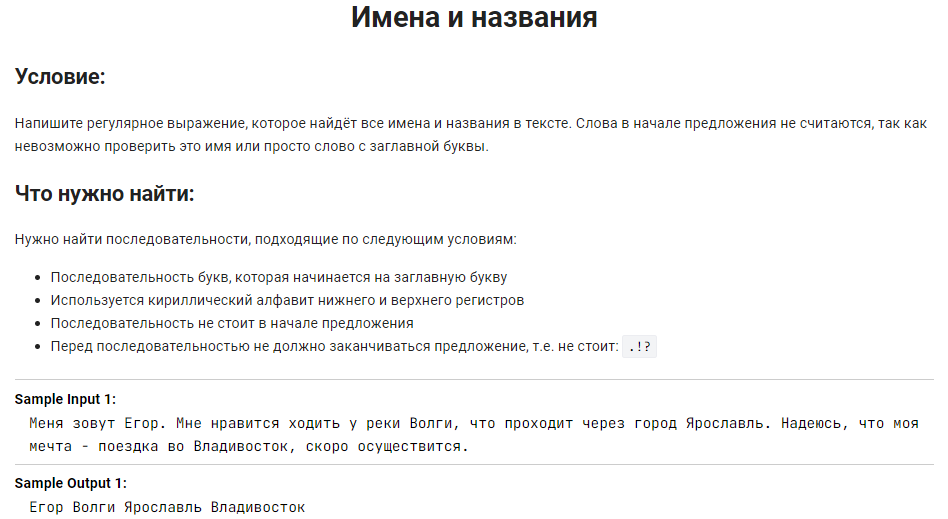

In [131]:
regex =  r'(?<![.!?] )(?<!\A)([А-ЯЁ][а-яё]*\b)'
regex = r'(?<![.!?] )(?<!^)(?<![.!?])[А-ЯЁ][а-яё]*'
regex = r'(?<!\. )(?<!\A)[А-ЯЁ][а-яё]+'
regex = r"(?<=\b\s)[А-ЯЁ]\w*"

string = 'Меня зовут Егор. Мне нравится ходить у реки Волги, что проходит через город Ярославль. Надеюсь, что моя мечта - поездка во Владивосток, скоро осуществится.'
print(re.findall(regex, string))

['Егор', 'Волги', 'Ярославль', 'Владивосток']


### ЗАДАНИЕ  
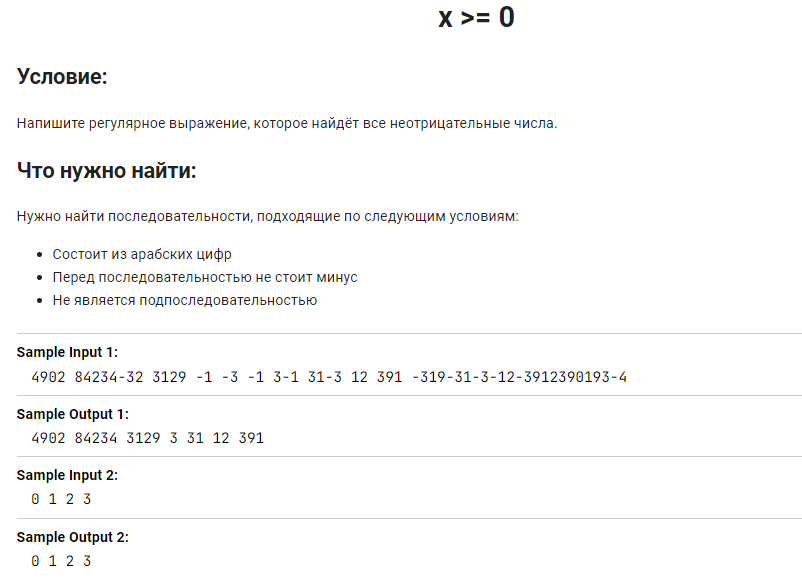

In [24]:
regex =  r'(?<!-)(\b\d+\b)'
regex = r'\b(?<!-)[0-9]+\b'

string = '4902 84234-32 3129 -1 -3 -1 3-1 31-3 12 391 -319-31-3-12-3912390193-4'
print(re.findall(regex, string))

['4902', '84234', '3129', '3', '31', '12', '391']


In [25]:
regex = r'\b(?<!-)[0-9]+\b'

string = '0 1 2 3'
print(re.findall(regex, string))

['0', '1', '2', '3']


## 1.6. Операция "или"

Синтаксис регулярных выражений позволяет писать такие выражения, которые найдут нужные строки при соответствии их хотя бы одному из выражений.       

- Если использовать оператор | "или" в скобочных выражениях или группах, то он не затронет символы извне.  
- В lookbehind можно использовать | "или" только если все шаблоны одинаковой длины. 

In [ ]:
# Такие выражения будут правильными:
r'(?<=hi!|bye)'
r'(?<![abcdef]|\d)'
r'(?<=\w|\W|\s)'

# Такое использование lookbehind вызовет ошибку re.error: look-behind requires fixed-width pattern:
r'(?<=hi|long_text)'
r'(?<![abcdef]|\d{4})'
r'(?=\w\s|\W)'

# Для того, чтобы обойти исключение, нужно использовать | "или" в non-capturing group:
r'(?:(?<=hi!)|(?<=long_text))'
r'(?:(?<![abcdef])|(?<!\d{4}))'
r'(?:(?<=\w\s)|(?<=\W))'

# В lookahead можно спокойно ставить условия с шаблонами разной длины, ошибок не будет.

#### Оператор "или" в квадратных скобках  
Если поставить символ | "или" в квадратные скобки, шаблон будет искать этот символ. Он не будет работать как оператор "или".  

- (?=regex) - проверяет, что переданное выражение regex стоит после основного шаблона.    
- (?!regex) - проверяет, что переданное выражение regex не стоит после основного шаблона.      
- (?<=regex) - проверяет, что переданное выражение regex стоит перед основным шаблоном.     
- (?<!regex) - проверяет, что переданное выражение regex не стоит перед основным шаблоном.          
- (?#regex) - позволяет писать комментарии в регулярных выражениях.    
- (?:regex)  - позволяет группировать шаблоны но не захватывать их в группы.     
- (regex) - обыкновенная скобочная группа.     
- (?P< name> regex) - обычная скобочная группа. Но вместе с номером ей будет присвоено имя name.     
- (?P< name >regex)(?P=name) - скобочная группа с именем позволяет к ней обращаться и искать такой же текст, который она захватила.

### ЗАДАНИЕ    
#### Найти слово Hi или Bye 

In [ ]:
correct_regex2 = r'(?:Hi|Bye)'   # Non-capturing group идеально подходит для группировки шаблонов
correct_regex = r'(Hi|Bye)'      # Поставленную выше задачу решает
correct_regex3 = r'Hi|Bye'       # Шаблон без групппировки. Также работает, поставленную задачу решает


# НЕПРАВИЛЬНОЕ регулярное выражение, т.к. оно равносильно следующему выражению: [BHeiy|]
# Квадратные скобки используются только для замены символов, условие "или" в них не работает
wrong_regex = r'[Hi|Bye]'

### ЗАДАНИЕ  
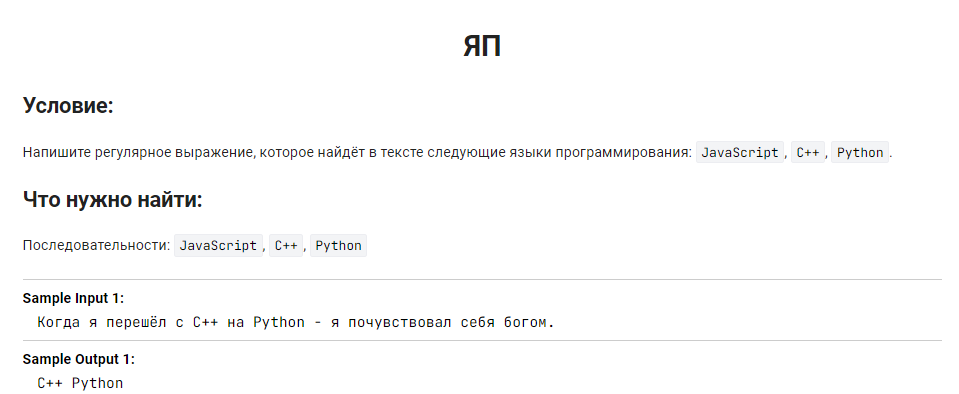

In [152]:
regex_1 = r'(?:JavaScript|C\+\+|Python)'
regex_2 = r'JavaScript|C\+\+|Python'

print(re.findall(regex_1, 'Когда я перешёл с C++ на Python - я почувствовал себя богом.'))
print(re.findall(regex_2, 'Когда я перешёл с C++ на Python - я почувствовал себя богом.'))

['C++', 'Python']
['C++', 'Python']


### ЗАДАНИЕ  
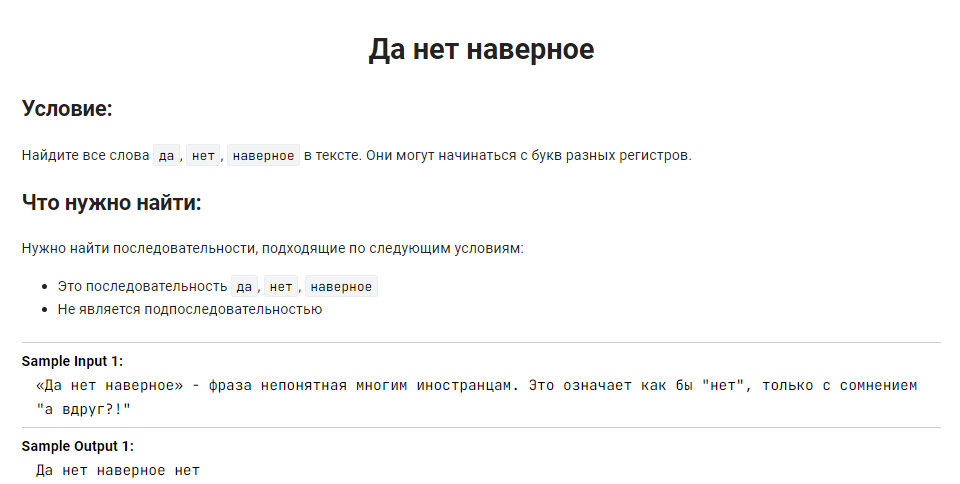

In [59]:
regex = r'(?:\b[Дд]а\b|\b[Нн]ет\b|\b[Нн]аверное\b)'
print(re.findall(regex, '«Да нет наверное» - фраза непонятная многим иностранцам. Это означает как бы "нет", только с сомнением "а вдруг?!"'))

['Да', 'нет', 'наверное', 'нет']


In [60]:
regex = r'(?:\b[Дд]а\b|\b[Нн]ет\b|\b[Нн]аверное\b)'
print(re.findall(regex, '«Да да Нет нет Наверное наверное дар когда'))

['Да', 'да', 'Нет', 'нет', 'Наверное', 'наверное']


In [153]:
regex_1 = r'\b(?:[Дд]а|[Нн](?:ет|аверное))\b'
regex_2 = r'\b(?i:да|нет|наверное)\b'
regex_3 = r'\b([Дд]а|[Нн]ет|[Нн]аверное)\b'
print(re.findall(regex_1, '«Да да Нет нет Наверное наверное дар когда'))
print(re.findall(regex_2, '«Да да Нет нет Наверное наверное дар когда'))
print(re.findall(regex_3, '«Да да Нет нет Наверное наверное дар когда'))

['Да', 'да', 'Нет', 'нет', 'Наверное', 'наверное']
['Да', 'да', 'Нет', 'нет', 'Наверное', 'наверное']
['Да', 'да', 'Нет', 'нет', 'Наверное', 'наверное']


In [154]:
regex = r'\b(?:([Дд]а)|[Нн](ет|аверное))\b'
print(re.findall(regex, '«Да да Нет нет Наверное наверное дар когда'))

[('Да', ''), ('да', ''), ('', 'ет'), ('', 'ет'), ('', 'аверное'), ('', 'аверное')]


### ЗАДАНИЕ  
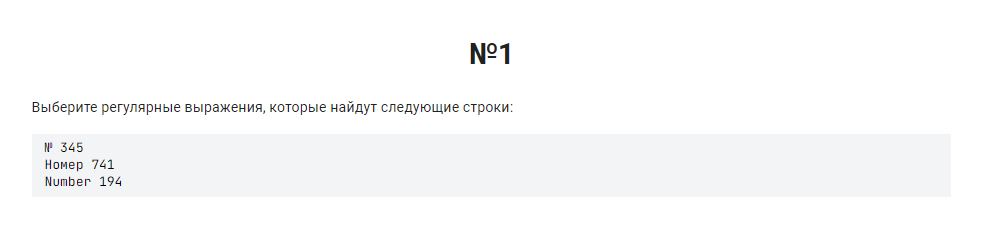

In [ ]:
regex = r'(?:(№|Номер)|Number) \d{3}'
regex = r'№ \d{3}|Номер \d{3}|Number \d{3}'
regex = r'(?:Номер|Number) \d{3}|№ \d{3}'
regex = r'(?:№|Номер|Number) \d{3}'
regex = r'(№|Номер|Number) \d{3}'

### ЗАДАНИЕ  
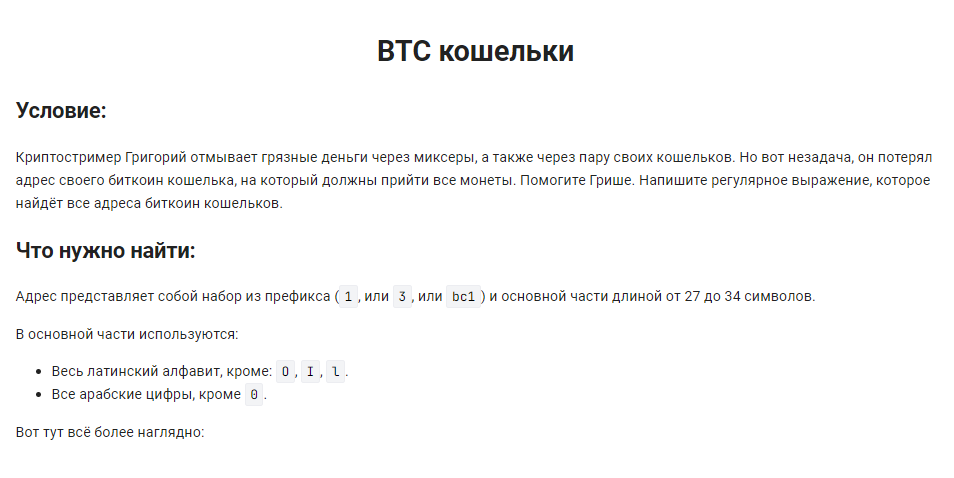

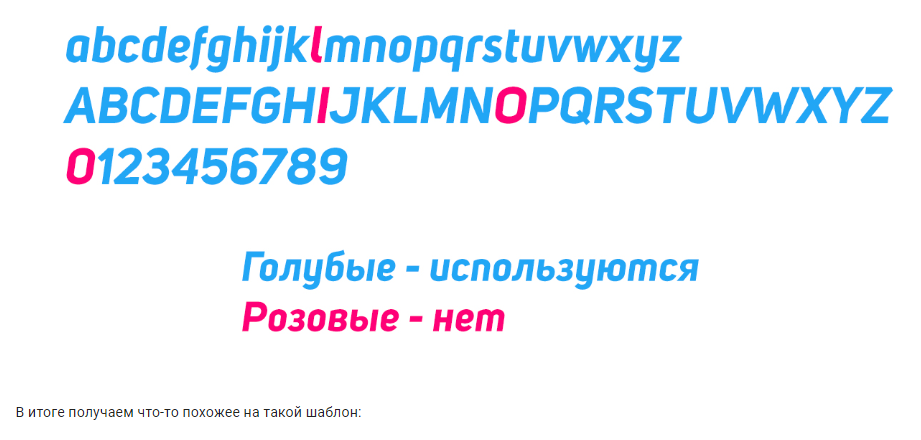

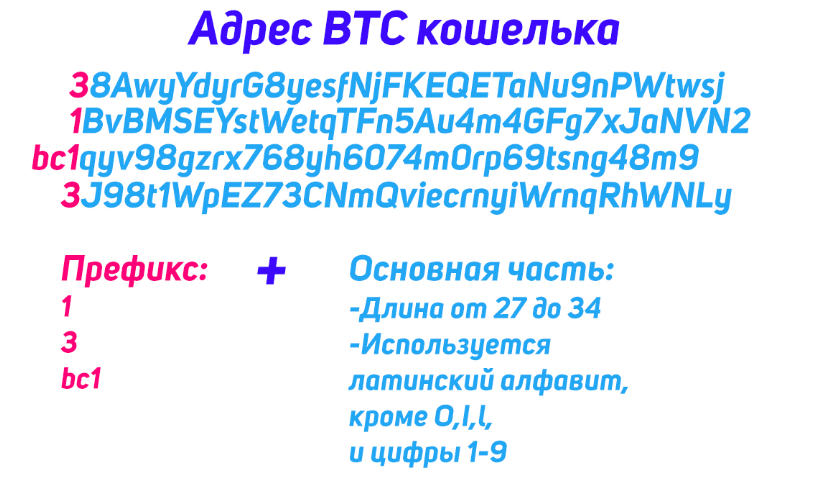

In [67]:
regex = r'\b(?:1|3|bc1)[a-km-zA-HJ-NP-Z1-9]{27,34}\b'
regex = r"\b(?:1|3|bc1)[^ _0OIl\WА-Яа-яёЁ]{27,34}\b"

string = '39Bett9aVjBtgLHkPL1Zv5P3kxtbVHiQqa 3Qbn5xTVuHDMtTGwkpgsjLrVMBecmobnNh'
print(re.findall(regex, string))

['39Bett9aVjBtgLHkPL1Zv5P3kxtbVHiQqa', '3Qbn5xTVuHDMtTGwkpgsjLrVMBecmobnNh']


In [73]:
regex = r'\b(?:1|3|bc1)(?:(?![OIl0])[a-zA-Z\d]){27,34}\b'
regex = r'\b(?:1|3|bc1)[a-zA-Z1-9]{27,34}[^OIl0 ]'

string = 'FDSF WDFSWD9FSD DFSD9FSD9F 33aGVnZCm9hmJDqoRDJFTQm7B2VsESFa8a DSFSDFS4fdsds4Wsd 1LxYHh12ysPTrYqanvSwFU4SQQA5NsmNdG sgsfsdsdfsds 1vj8Q9w16Ats5wSGjG6vbmFofr9x9Kz2M 1NT6cJZaDY7TDwRZ2NiVDTG6wfS1gue3gV sdfsdfsdfsdfsdf sdf sdfsdfsdfs 1MAJzPUS2JwQ9T4Gya9knokpsEMn3hqG6L 1M6TdG68oGCTzU1HCSMNMppKbWbsMsgevf 1NatRaPvbVjqoWP8W3bXV9rmY1SjnAF7ER 1Pki745E2oZxsBzQWfyyYocKzKEiARufcq 1Mz3aXtGBgWQyVzuysVC6Dti4uy8ifMZDZ 1N8nBtfvFXfSzDYyVFsae5zeSgQpt4mEfz'
print(re.findall(regex, string))

['33aGVnZCm9hmJDqoRDJFTQm7B2VsESFa8a', '1LxYHh12ysPTrYqanvSwFU4SQQA5NsmNdG', '1vj8Q9w16Ats5wSGjG6vbmFofr9x9Kz2M', '1NT6cJZaDY7TDwRZ2NiVDTG6wfS1gue3gV', '1MAJzPUS2JwQ9T4Gya9knokpsEMn3hqG6L', '1M6TdG68oGCTzU1HCSMNMppKbWbsMsgevf', '1NatRaPvbVjqoWP8W3bXV9rmY1SjnAF7ER', '1Pki745E2oZxsBzQWfyyYocKzKEiARufcq', '1Mz3aXtGBgWQyVzuysVC6Dti4uy8ifMZDZ', '1N8nBtfvFXfSzDYyVFsae5zeSgQpt4mEfz']


In [72]:
letters = 'ABCDEFGHJKLMNPQRSTUVWXYZabcdefghijkmnopqrstuvwxyz'
regex = fr'\b(?:1|3|bc1)(?:[{letters}1-9]){{27,34}}\b'

string = '39Bett9aVjBtgLHkPL1Zv5P3kxtbVHiQqa 3Qbn5xTVuHDMtTGwkpgsjLrVMBecmobnNh'
print(re.findall(regex, string))

['39Bett9aVjBtgLHkPL1Zv5P3kxtbVHiQqa', '3Qbn5xTVuHDMtTGwkpgsjLrVMBecmobnNh']


## 1.7. ReDoS-атака, catastrophic backtracking, притяжательные квантификаторы, атомарная группировка

### ReDoS-атака

**Re-DoS-атака** - атака на сервисы, неправильно использующие регулярные выражения, позволяющая их замедлить или полностью вывести из строя. Она основана на проблеме регулярных выражений под названием **catastrophic backtracking**.      

**Catastrophic backtracking** - явление, когда вычисление регулярного выражения занимает очень много времени или вообще не завершается из-за чрезмерного количества возможных путей поиска.

Если к группе применён квантификатор и внутри этой группы используется ещё один квантификатор или |, то регулярное выражение может быть неконтролируемым. Примеры таких выражений:        
- (?:a+)+      
- (?:a|aa)+        
- (a|a?)+     
- ([a-zA-Z_]+)* 

**Решение проблемы catastrophic backtracking**:    
- Переписать регулярное выражение, если это возможно (сократить количество квантификаторов и условий "или")  
- Перед использованием выражения проверять входные данные (например, не применять слишком большой текст)    
- Контролировать использование регулярного выражения (например, останавливать поиск, если он идёт слишком долго)   
- Использовать специальные средства из модуля re (притяжательные квантификаторы, атомарная группировка)

### Притяжательные квантификаторы

Если после жадного квантификатора поставить +, он станет притяжательным.    
Притяжательные квантификаторы, как и жадные, пытаются найти максимально возможное количество вхождений. Но в отличие от жадных квантификаторов, они не допускают обратного отслеживания (back-tracking), когда регулярное выражение не может найти совпадение. Это значит, что движок не будет проходить огромное количество путей и закончит свою работу раньше, если совпадение не будет найдено. Как и в случае с ленивыми квантификаторами, делать квантификатор {n} притяжательным нецелесообразно.  

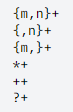

### Атомарная группировка 

Второе решение проблемы catastrophic backtracking - атомарная группировка (?>regex).  
В случае атомарной группировки происходит поиск вхождения regex, как если бы оно было отдельным регулярным выражением. Если совпадения найдены - движок регулярных выражений пытается найти совпадения для оставшейся части регулярного выражения, следующего после атомарной группировки. Если совпадений нет - движок регулярных выражения может откатиться назад только на место до атомарной группировки.  

С помощью атомарной группировки можно сказать движку, что откатываться в этом месте и искать всевозможные пути не имеет смысла: внутри (?>regex) откат запрещён. Например, выражение (?>.*). никогда не найдёт совпадений, потому что шаблон:       

    

нашёл бы все возможные символы в тексте, и оставшаяся точка не смогла бы найти совпадение.    

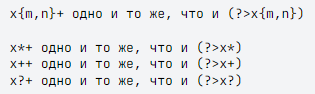

## 1.8. Правила использования регулярных выражений

- При использовании регулярных выражений не по назначению - можно нанести вред. Если задача легко решается без re - не стоит их использовать.        
- Не стоит парсить HTML/XHTML/JSON с помощью регулярных выражений! Существуют специальные библиотеки для парсинга данных. Регулярные выражения созданы для других целей. Это правило не распространяется на парсинг самих данных. Например, если необходимо найти все номера тлф. в HTML-документе - регулярные выражения идеально подойдут для этой задачи.   
- Group VS Non-capturing group в Python. Работа функций из модуля re очень сильно зависит от групп. Чтобы программа не вела себя непредсказуемо, вместо групп зачастую лучше использовать Non-capturing group. Группы имеет смысл использовать только тогда, когда мы к ним обращаеемся или работаем с их данными. Во всех остальных случаях нужно использовать Non-capturing group.
- В рамках задач этого ноутбука нарушаются некоторые правила в целях отработки навыков.  

# 2. Объект Match  (основные методы и атрибуты)

Объект Match нужен для получения более детальной информации о найденных совпадениях.         
У объекта Match есть несколько методов и атрибутов:     
- expand()  
- group()  
- groups()  
- groupdict()  
- start()  
- end()   
- span()  
- lastindex  
- lastgroup  
- pos  
- endpos  
- re  
- string

### Нулевая группа

Почти все методы принимают на вход необязательный аргумент __group. Этот аргумент - номер группы, у которой нужно получить соответствующее значение. Нулевая группа - полная строка, которую захватило регулярное выражение.

## Методы    
re.match(regex, text)    
group([group1, ...])   
start(__ group = 0),   
end(__ group = 0)  
span(__ group = 0)

In [76]:
regex = r'П.+?т'
text = 'Привет, как тебя зовут?'

print(text, len(text), sep = '\n')

Привет, как тебя зовут?
23


**re.match(regex, text)**    
Функция match возвращает Match-объект, где span - индексы начала и конца совпадения, match - само совпадение

In [78]:
m = re.match(regex, text)   
print(m)
print(type(m))

<re.Match object; span=(0, 6), match='Привет'>
<class 're.Match'>


**group([group1, ...])**    
Метод group возвращает найденное совпадение по номеру группы

In [90]:
# Все вызовы метода group к объекту класса match выведут совпадение нулевой группы, т.е. всего регулярного выражения
print(m.group())  # Если в метод не передать аргумент, то он по умолчанию выведет нулевую группу
print(m.group(0)) # Можно передать номер нужной группы в метод
print(m[0]) 

print(type(m.group()))

Привет
Привет
Привет
<class 'str'>


**start(__ group = 0), end(__ group = 0)**     
Методы start и end возвращают индексы начала и конца совпадения с регулярным выражением группы, номер которой был передан в метод

In [88]:
print(m.start())  
print(m.end())    
print(type(m.start))

print(m.start(0)) 
print(m.end(0))   
print(type(m.end))

0
6
<class 'builtin_function_or_method'>
0
6
<class 'builtin_function_or_method'>


**span(__ group = 0)**   
Метод span возвращает кортеж с индексом начала и конца совпадения группы, номер которой был передан в метод 

In [87]:
print(m.span())  
print(m.span(0)) 
print(type(m.span))

(0, 6)
(0, 6)
<class 'builtin_function_or_method'>


## Атрибуты  
(pos, endpos, re, string)

#### Атрибут pos  
Используется вместе с объектом Pattern.  
Если обратиться к атрибуту, можно получить аргумент pos, переданный в функцию. pos - это позиция, с которой функция начинает искать совпадения. pos можно использовать только с объектом Pattern. В коде ниже Pattern не используется, поэтому у pos стоит значение по умолчанию: 0

In [86]:
print(m.pos) 
print(type(m.pos))

0
<class 'int'>


#### Атрибут endpos  
Используется вместе с объектом Pattern.  
Если обратиться к атрибуту, можно получить аргумент endpos, переданный в функцию. endpos - это позиция, до которой функция ищет совпадения. endpos можно использовать только с объектом Pattern. В коде ниже Pattern не используется, поэтому у endpos стоит значение по умолчанию: индекс последнего символа в строке

In [85]:
print(m.endpos) 
print(type(m.endpos))

23
<class 'int'>


#### Атрибут re  
Если обратиться к атрибуту re, можно получить регулярное выражение, которое использовалось для поиска.  
Возвращается не строка с регулярным выражением, а объект Pattern

In [83]:
print(m.re)
print(type(m.re))

re.compile('П.+?т')
<class 're.Pattern'>


#### Атрибут string
Если обратиться к атрибуту string, можно получить строку, в которой искали совпадения

In [84]:
print(m.string)
print(type(m.string))

Привет, как тебя зовут?
<class 'str'>


### ЗАДАНИЕ  
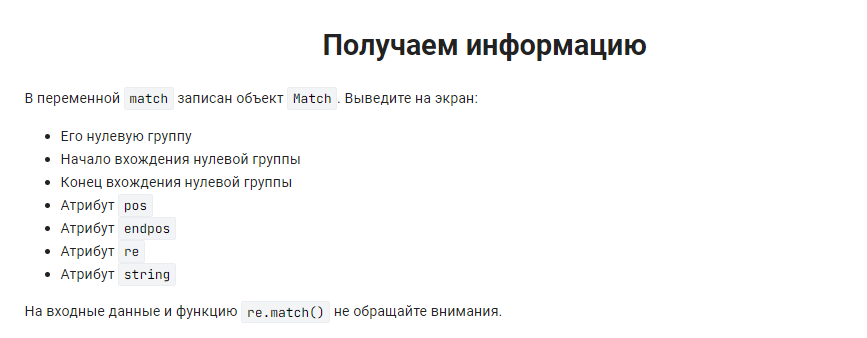

In [93]:
match = re.match(input(), input())

I
I love regex!


In [96]:
print(match.group(0))   # Нулевая группа
print(match.start(0))   # Начало вхождения нулевой группы
print(match.end(0))     # Конец вхождения нулевой группы
print(match.pos)        # Атрибут pos
print(match.endpos)     # Атрибут endpos
print(match.re)         # Атрибут re
print(match.string)     # Атрибут string

I
0
1
0
13
re.compile('I')
I love regex!


In [97]:
match = re.match(input(), input())

\b[А-Яа-я]+\b
Второй тест


In [98]:
print(match.group(0))
print(match.start(0))
print(match.end(0))
print(match.pos)
print(match.endpos)
print(match.re)
print(match.string)

Второй
0
6
0
11
re.compile('\\b[А-Яа-я]+\\b')
Второй тест


In [23]:
match = re.match(input(), input())
print(match, type(match), sep = '\n')
print()

for i in ('group() start() end() pos endpos re string').split():
    print(eval(f'match.{i}'))

\b[А-Яа-я]+\b
Второй тест
<re.Match object; span=(0, 6), match='Второй'>
<class 're.Match'>

Второй
0
6
0
11
re.compile('\\b[А-Яа-я]+\\b')
Второй тест


In [105]:
match = re.match(input(), input())
print('\n', match, type(match))
print()

[print(eval(f'match.{arg}')) for arg in ('group()', 'start()', 'end()', 'pos', 'endpos', 're', 'string')]

I
I love regex!

 <re.Match object; span=(0, 1), match='I'> <class 're.Match'>

I
0
1
0
13
re.compile('I')
I love regex!


[None, None, None, None, None, None, None]

### ЗАДАНИЕ  
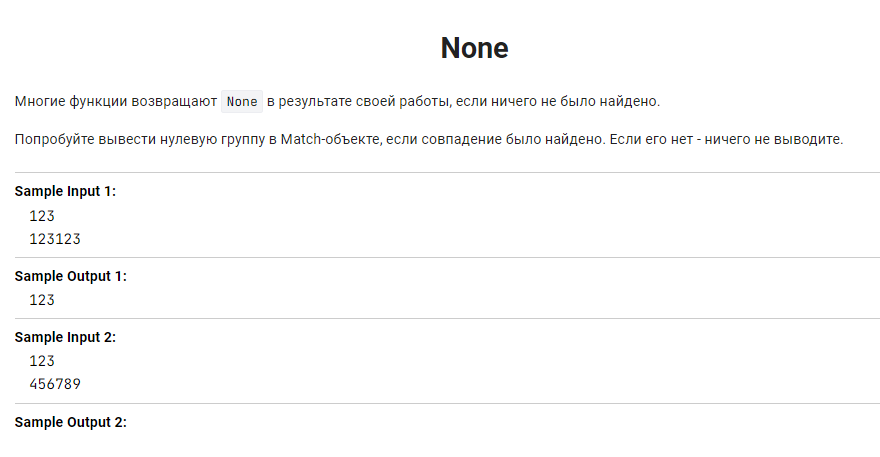

In [133]:
match = re.match(input(), input())
if match: print(match.group(0))

123
123456
123


In [132]:
match[0]

'123'

# 3. Функции модуля re

**3.1. re.search()** - возвращает объект Match с первым найденным совпадением в строке или None, если совпадений не нашлось.  
**3.2. re.match()** - возвращает объект Match с совпадением в начале строки или None, если в начале строки нет совпадений.   
**3.3. re.fullmatch()** - определяет соответствие строки шаблону. Если вся строка соответствует шаблону - выводит объект Match, иначе - None.   
**3.4. re.finditer()** - возвращает итератор Match объектов с вхождениями переданного шаблона в строке.   
**3.5. re.findall** - возвращает список со всеми найденными совпадениями или пустой список, если совпадений не нашлось.   
**3.6. re.split** - разрезает текст на части по найденным совпадениям. Возвращает список частей разделённой строки или список из строки если совпадений нет.  
**3.7. re.sub** - заменяет совпадения на переданный шаблон. Возвращает изменённую строку или изначальную строку если совпадений не нашлось.  
**3.8. re.subn** - заменяет совпадения на переданный шаблон. Возвращает кортеж с изменённой строкой и количеством совершённых замен.    
**3.9. re.escape** - экранирует символы в переданной строке.

## 3.1. re.search()

**Функция re.search(pattern, string, flags = 0)** - ищет первое совпадение в строке.     
pattern - регулярное выражение, string - строка, к которой нужно применить регулярное выражение, flags - флаги.   
Возвращаемое значение - объект Match, если совпадение было найдено, или None, если совпадений нет.

In [26]:
# re.search ищет только одно вхождение, самое первое
pattern = r'\d{3}'
string = 'abc 123 def 456 fed 321 cba'
res = re.search(pattern, string)

print(string)
print(res) 
print(res[0]) 
print(res.group(0))
print(res.group())

abc 123 def 456 fed 321 cba
<re.Match object; span=(4, 7), match='123'>
123
123
123


In [30]:
result = re.search(r'\d{3}', "abcdef")
print(string)
print(result)

abc 123 def 456 fed 321 cba
None


In [28]:
result = re.search(r'\d{3}', "505abcdef")
print(string)
print(result) 
print(result[0]) 

abc 123 def 456 fed 321 cba
<re.Match object; span=(0, 3), match='505'>
505


### ЗАДАНИЕ  
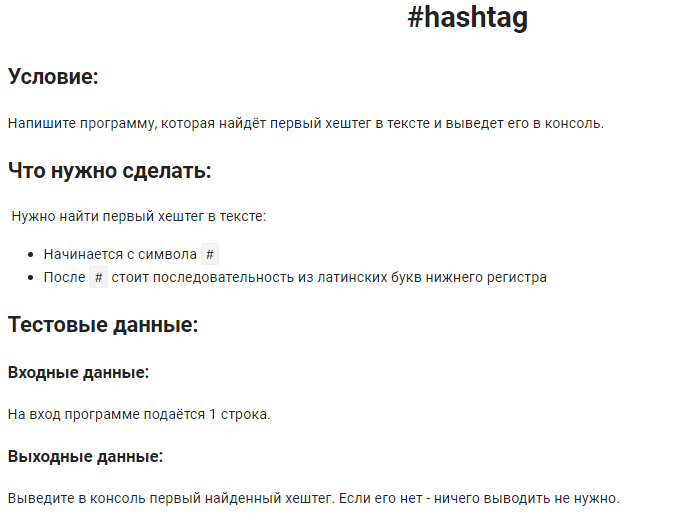

In [127]:
# re.search ищет только одно вхождение, самое первое
pattern = r'#\w*'
string = 'Some #hashtags for you'
res = re.search(pattern, string)

print(string)
print(res) 
if res:
    print(res[0])

Some #hashtags for you
<re.Match object; span=(5, 14), match='#hashtags'>
#hashtags


In [134]:
try:
    print(re.search(r"#[a-z]+", input()).group(0))
except:
    pass

There are no hashtags :(


In [147]:
try:
    print(re.search(r'#[a-z]+\b', input())[0])
except:
    ...

There are no hashtags :(


In [141]:
pattern = r'#[a-z]+'
result = re.search(pattern, input())
print(result.group(0) if result else '')

There are no hashtags :(



In [143]:
if result := re.search(r'#\w+', input()):
    print(result.group())

Some #hashtags for you
#hashtags


In [149]:
if search_match := re.search(r'#[a-z]+\b', input()): print(search_match[0])

There are no hashtags :(


In [150]:
if search_match := re.search(r'#[a-z]+\b', input()): print(search_match[0])

Some #hashtags for you
#hashtags


## 3.2. re.match()

**Функция re.match(pattern, string, flags = 0)** – то же самое, что и re.search(), но ищет совпадение только в начале строки.  

In [81]:
# re.match ничего не нашйдет, т.к. в начале строки нет совпадений 
pattern = r'\d{3}'
string = 'abc 123 def 456 fed 321 cba'
res = re.match(pattern, string)

print(string)
print(res) 

abc 123 def 456 fed 321 cba
None


In [187]:
# Если перенести последовательность из трёх цифр в начало, тогда она будет найдена
pattern = r'\d{3}'
string = '123 abc 456 def 654 cba 321'
res = re.match(pattern, string)

print(string)
print(res) 
print(res.group(0))
print(res[0])

123 abc 456 def 654 cba 321
<re.Match object; span=(0, 3), match='123'>
123
123


### ЗАДАНИЕ  
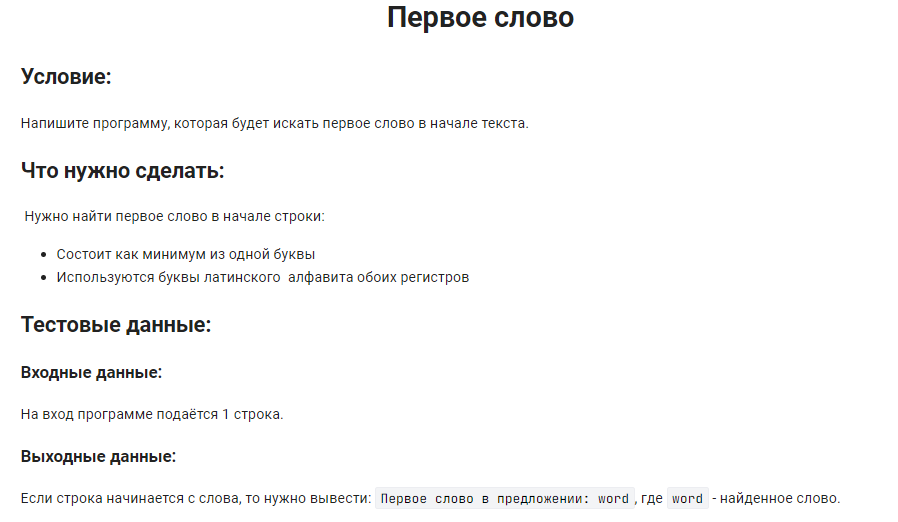

In [155]:
try:
    word = re.match(r"\b[a-zA-Z]*\b", input()).group(0)
    if word:
        print(f'Первое слово в предложении: {word}')
except:
    pass

My car is the fastest!
Первое слово в предложении: My


In [156]:
try:
    word = re.match(r"\b[a-zA-Z]*\b", input()).group(0)
    if word:
        print(f'Первое слово в предложении: {word}')
except:
    pass

1234


In [157]:
if word := re.match(r'[a-zA-Z]+\b', input()):
    print('Первое слово в предложении:', word[0])

My car is the fastest!
Первое слово в предложении: My


In [158]:
if word := re.match(r'[a-zA-Z]+\b', input()):
    print('Первое слово в предложении:', word[0])

12345


In [163]:
if r:=__import__('re').match(r'(?i)[a-z]+', input()): print('Первое слово в предложении:', r.group())

My car is the fastest!
Первое слово в предложении: My


In [168]:
x = re.match(r'[a-zA-Z]+', input())

print(f'Первое слово в предложении: {x.group()}' if x else '')

My car is the fastest!
Первое слово в предложении: My


In [169]:
x = re.match(r'[a-zA-Z]+', input())

print(f'Первое слово в предложении: {x.group()}' if x else '')

1234



## 3.3. re.fullmatch()

**Функция re.fullmatch(pattern, string, flags = 0)** - определяет соответствие строки переданному шаблону. Если вся строка соответствует шаблону - выводит объект Match, иначе - None.

In [46]:
print(re.fullmatch('\d', '111'))     # None
print(re.fullmatch('\d', '1'))       # <re.Match object; span=(0, 1), match='1'>
print(re.fullmatch('\d{3}', '111'))  # <re.Match object; span=(0, 3), match='111'>
print(re.fullmatch('\d+', '111'))    # <re.Match object; span=(0, 3), match='111'>

None
<re.Match object; span=(0, 1), match='1'>
<re.Match object; span=(0, 3), match='111'>
<re.Match object; span=(0, 3), match='111'>


### ЗАДАНИЕ  
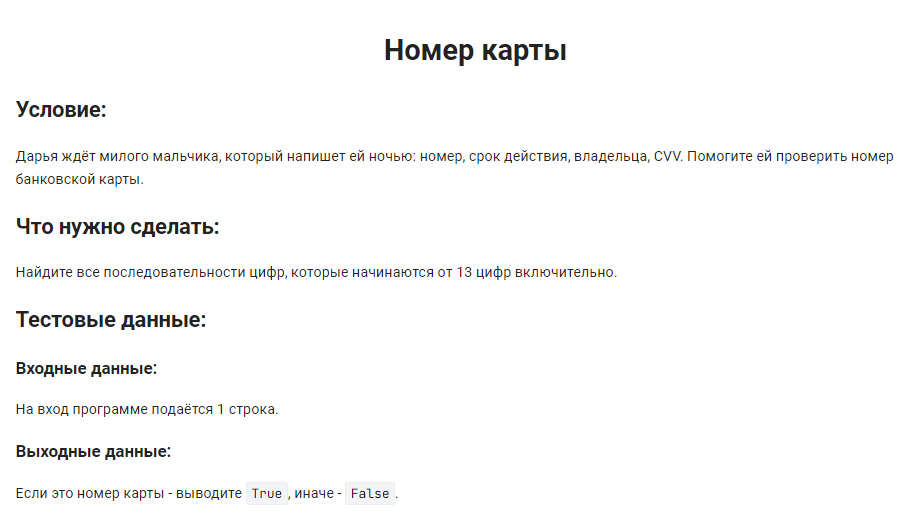

In [1]:
# РЕШЕНИЕ БЕЗ re (Тот самый случай, когда можно обойтись без re)
s = input()[:13]
print(s.isdigit() and len(s) >= 13)

s = input()[:13]
print(all([s.isdigit(), len(s) >= 13]))

s = input()[:13]
print(bool(s.isdigit() and len(s) >= 13))

1234567891011121
True
123
False
123
False


In [170]:
try:
    result = re.fullmatch(r'\d{13,}', input()).group()
    if result:
        print(True)
except:
    print(False)

1234567891011121
True


In [5]:
print(bool(re.fullmatch(r'\d{13,}', input())))
print(bool(__import__('re').fullmatch(r'\d{13,}', input())))

123
False
1234567891011121
True


In [4]:
match = re.fullmatch(r"\d{13,}", input())
print(not not match)

match = re.fullmatch(r'\d{13,}', input())
print(True if match else False)

1234567891011121
True
123
False


In [32]:
match = re.fullmatch(r'\d{13,}', input())
print(bool(match))

1234567891011121
True


## 3.4. re.finditer()

**Функция re.finditer(pattern, string, flags = 0)** - возвращает итератор Match объектов с вхождениями pattern в строке string.

In [36]:
pattern = r'\d{3}'
string = 'abc 123 def 456 fed 321 cba'

result = re.finditer(pattern, string, 0)

print(string)
for i in result:
    print(i)

abc 123 def 456 fed 321 cba
<re.Match object; span=(4, 7), match='123'>
<re.Match object; span=(12, 15), match='456'>
<re.Match object; span=(20, 23), match='321'>


In [192]:
string = 'abc 123 def 456 fed 321 cba'
result = re.finditer(pattern, string, 0)
print(string)
print(result)
print()
print(next(result))
print(next(result))

abc 123 def 456 fed 321 cba

<re.Match object; span=(4, 7), match='123'>
<re.Match object; span=(12, 15), match='456'>


### ЗАДАНИЕ  
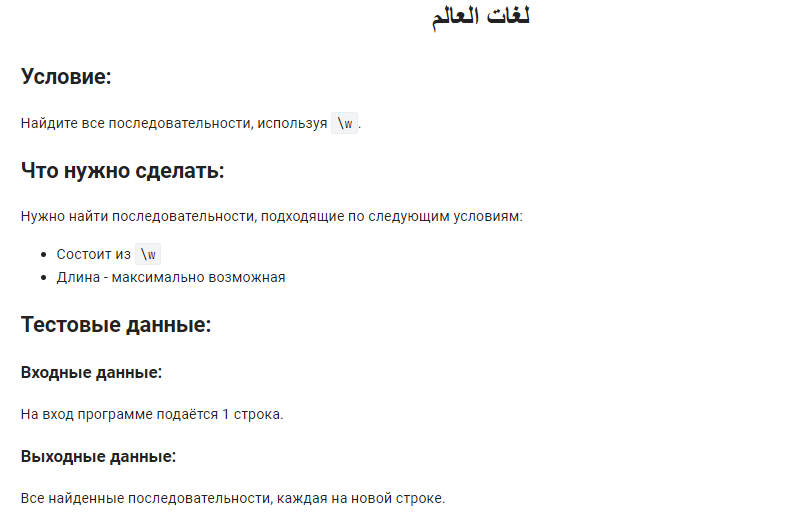

In [198]:
result = re.finditer(r'\b\w+\b', input())

for i in result:
    print(i.group(0))

يحتاج الجسم القوي إلى عقل قوي.
يحتاج
الجسم
القوي
إلى
عقل
قوي


In [199]:
result = re.finditer(r'\b\w+\b', input())

for i in result:
    print(i[0])

這個理論有一個缺點。
這個理論有一個缺點


In [200]:
print(*(__import__('re').findall(r'\b\w+\b', input())), sep = '\n')

1234567890_+
1234567890_


In [208]:
print(*(re.findall(r'\b\w+\b', input())), sep = '\n')

يحتاج الجسم القوي إلى عقل قوي.
يحتاج
الجسم
القوي
إلى
عقل
قوي


In [202]:
[print(macth.group(0)) for macth in re.finditer(r'\b\w+\b', input())]

Máme otevřeno 24 hodin denně.
Máme
otevřeno
24
hodin
denně


[None, None, None, None, None]

## 3.5. re.findall()

**Функция re.findall(pattern, string, flags = 0)** - возвращает список всех найденных неперекрывающиеся совпадений.    
Возвращаемое значение - cписок совпадений, если они есть, и пустой список, если совпадений нет.  

Результат зависит от количества групп захвата в шаблоне:  
- Если групп нет, возвращается список строк, соответствующих всему шаблону.  
- Если существует ровно одна группа, возвращается список строк, соответствующих этой группе.  
- Если присутствует несколько групп, возвращается список кортежей строк, соответствующих группам.    
- Группы без захвата не влияют на форму результата.

In [78]:
pattern = r'\d{3}'
string = 'abc 123 def 456 fed 321 cba'

result = re.findall(pattern, string)
print(string)
print(result) 

abc 123 def 456 fed 321 cba
['123', '456', '321']


### ЗАДАНИЕ  
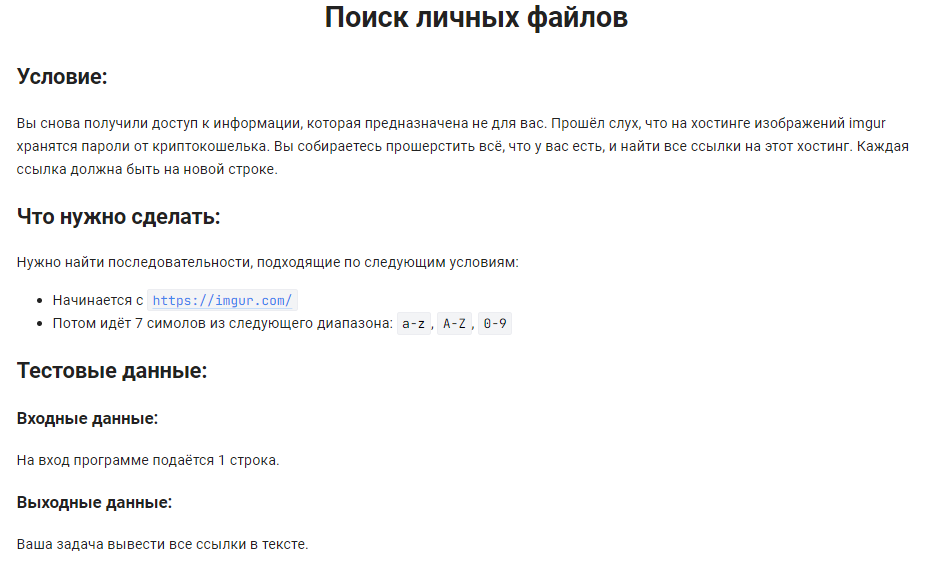

In [44]:
pattern_1 = r'https://imgur.com/[a-zA-Z0-9]{7}'
pattern_2 = r'(?:https://imgur.com/)[a-zA-Z0-9]{7}'
pattern_3 = r'(?:https://imgur.com/)(?:[a-zA-Z0-9]{7})'

In [38]:
string_1 = 'The standardhttps://imgur.com/8oHc67r Lorem Ipsumhttps://imgur.com/3rGUJqOpassage, used since the 1500s'
string_2 = 'У лукоморья дуб зелёный;Златая цепь на дубе том:И днём и ночью кот учёныйВсё ходит по цепи кругом;Идёт на https://weboas.is/право — песнь заводит,Налево — сказку говорит.Там чудеса: там леший бродит,Русалка на ветвях сидит;Там на неведомых дорожкахСледы невиданных зверей;Избушка там на курьих ножкахСтоитhttps://www.youtube.com/без окон, без дверей;Т https://imgur.com/pecSvGKам лес и дол видений полны;Там о заре прихлынут волныНа брег песчаный и пустой,И тридцать витязей прекрасныхЧредой из вод выходят ясных,И с ними дядька их морской;Там королевич мимоходомПленяет грозного царя;Там в облаках перед народом https://imgur.com/LHbcwKWЧерез леса, через моряКолдун несёт богатыря;В темнице там царевна тужит,А бурый волк ей верно служит;Там ступа с Бабою ЯгойИдёт, бредёт https://imgur.com/xM6Pc8R сама собой,Там царь Кащей над златом чахнет;Там русский дух… там Русью пахнет!И там яhttps://imgur.com/nD6OEUXбыл, и мёд я пил;У моря видел дуб зелёный;Под ним сидел, и кот учёныйСвои мне сказки говорил.'

In [51]:
print(re.findall(pattern_1, string_2))
print(re.findall(pattern_2, string_2))
print(re.findall(pattern_3, string_2))

print(*[i for i in re.findall(pattern_3, string_2)], sep = '\n')

['https://imgur.com/pecSvGK', 'https://imgur.com/LHbcwKW', 'https://imgur.com/xM6Pc8R', 'https://imgur.com/nD6OEUX']
['https://imgur.com/pecSvGK', 'https://imgur.com/LHbcwKW', 'https://imgur.com/xM6Pc8R', 'https://imgur.com/nD6OEUX']
['https://imgur.com/pecSvGK', 'https://imgur.com/LHbcwKW', 'https://imgur.com/xM6Pc8R', 'https://imgur.com/nD6OEUX']
https://imgur.com/pecSvGK
https://imgur.com/LHbcwKW
https://imgur.com/xM6Pc8R
https://imgur.com/nD6OEUX


In [52]:
print(re.findall(pattern_1, string_1))
print(re.findall(pattern_2, string_1))
print(re.findall(pattern_3, string_1))

print(*[i for i in re.findall(pattern_3, string_1)], sep = '\n')

['https://imgur.com/8oHc67r', 'https://imgur.com/3rGUJqO']
['https://imgur.com/8oHc67r', 'https://imgur.com/3rGUJqO']
['https://imgur.com/8oHc67r', 'https://imgur.com/3rGUJqO']
https://imgur.com/8oHc67r
https://imgur.com/3rGUJqO


## 3.6 re.split()
**Функция re.split(pattern, string, maxsplit = 0, flags = 0)** – разбивает строки по заданному паттерну.

**Параметры:**     
pattern - регулярное выражение  
string - строка, к которой нужно применить регулярное выражение  
maxsplit - максимальное количество делений строки  
flags - флаги  

**Возвращаемое значение:**    
Если совпадения есть - список частей разделённой строки, иначе -string

In [77]:
# Если совпадения есть, разделит строку на части
pattern = r'\s\d{3}\s'
string = 'abc 123 def 456 fed 321 cba'
result = re.split(pattern, string)

print(string)
print(result) 

abc 123 def 456 fed 321 cba
['abc', 'def', 'fed', 'cba']


In [75]:
# Если нужно разделить строку только определённое количество раз, можно передать аргумент в maxsplit
pattern = r'\s\d{3}\s'
string = 'abc 123 def 456 fed 321 cba'
result = re.split(pattern, string, 2)

print(string)
print(result) 

abc 123 def 456 fed 321 cba
['abc', 'def', 'fed 321 cba']


In [76]:
# Если совпадений нет, функция вернёт [string]:
pattern = r'123'
string = '456'
result = re.split(pattern, string)

print(string)
print(result) 

456
['456']


### ЗАДАНИЕ  
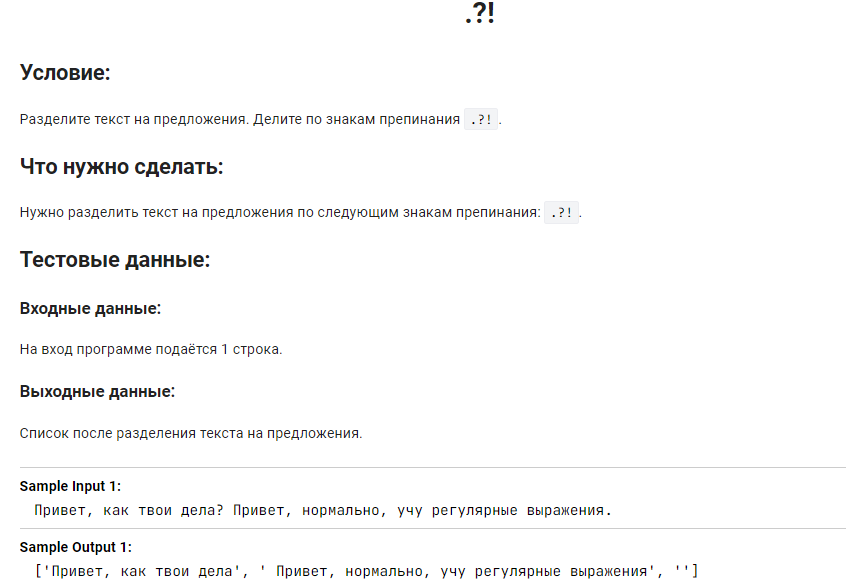

In [103]:
pattern = r'[\.?!]'
pattern = r'(?<=\w.)[.?!]'

string_1 = 'Привет, как твои дела? Привет, нормально, учу регулярные выражения.'
string_2 = "The first one is heavy!This actually goes really well with Chris's workout he's doing."

print(string_1)
print(re.split(pattern, string_1))
print(__import__('re').split(r'[?.!]', input()))

Привет, как твои дела? Привет, нормально, учу регулярные выражения.
['Привет, как твои дела', ' Привет, нормально, учу регулярные выражения', '']
The first one is heavy!This actually goes really well with Chris's workout he's doing.
['The first one is heavy', "This actually goes really well with Chris's workout he's doing", '']


## 3.7. re.sub()

**Функция re.sub(pattern, replace, string, count = 0, flags = 0)** – заменяет найденные вхождения на заданные символы и возвращает исправленную строку.

**Параметры:**  
pattern - регулярное выражение  
replace - то, на что нужно заменить найденное вхождение  
string - строка, к которой нужно применить регулярное выражение  
count - (необязательный аргумент) максимальное число вхождений, подлежащих замене. Если этот параметр опущен или равен нулю, произойдет замена всех вхождений  
flags - флаги   

**Возвращаемое значение:**  
Если совпадения есть - изменённая строка, если совпадений нет -string

In [94]:
pattern = r'[a-z]{3}'
replace = '111'
string = 'abc 123 def 456 fed 321 cba'
result = re.sub(pattern, replace, string)

print(string)
print(result) 
print(type(result)) 

abc 123 def 456 fed 321 cba
111 123 111 456 111 321 111
<class 'str'>


In [95]:
#  Заменяем первые две трёхбуквенные последовательности на 111
pattern = r'[a-z]{3}'
replace = '111'
string = 'abc 123 def 456 fed 321 cba'
result = re.sub(pattern, replace, string, 2)

print(string)
print(result) 
print(type(result)) 

abc 123 def 456 fed 321 cba
111 123 111 456 fed 321 cba
<class 'str'>


In [90]:
# Если совпадений нет - получаем строку обратно
pattern = r'[a-z]{10}'
replace = '111'
string = 'abc 123 def 456 fed 321 cba'

result = re.sub(pattern, replace, string)
print(string)
print(result) 

abc 123 def 456 fed 321 cba
abc 123 def 456 fed 321 cba


### ЗАДАНИЕ  
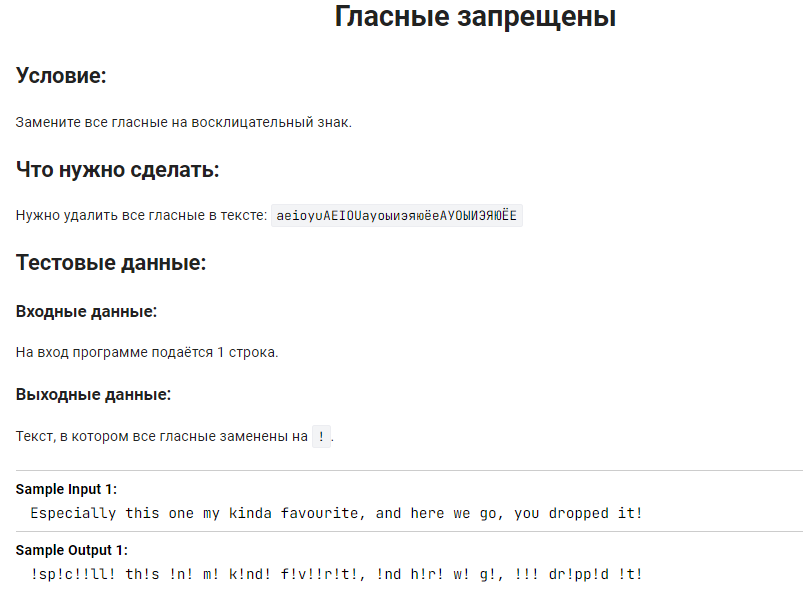

In [102]:
pattern = r'[aeioyuAEIOUауоыиэяюёеАУОЫИЭЯЮЁЕ]'

string_1 = 'Especially this one my kinda favourite, and here we go, you dropped it!'
string_2 = "Поставил данную композицию на будильник! Теперь просыпаюсь за час до него,спасибо!"

print(string_1)
print(re.sub(pattern, '!', string_1))
print(__import__('re').sub(pattern, '!', input()))

Especially this one my kinda favourite, and here we go, you dropped it!
!sp!c!!ll! th!s !n! m! k!nd! f!v!!r!t!, !nd h!r! w! g!, !!! dr!pp!d !t!
Поставил данную композицию на будильник! Теперь просыпаюсь за час до него,спасибо!
П!ст!в!л д!нн!! к!мп!з!ц!! н! б!д!льн!к! Т!п!рь пр!с!п!!сь з! ч!с д! н!г!,сп!с!б!!


## 3.8. re.subn()

**Функция re.subn(pattern, replace, string, count =0, flags = 0)** выполняет ту же операцию, что и функция re.sub(), но возвращает кортеж.   

**Параметры:**  
pattern - регулярное выражение  
replace - то, на что нужно заменить найденное вхождение  
string - строка, к которой нужно применить регулярное выражение   
count - (необязательный аргумент) максимальное число вхождений, подлежащих замене. Если этот параметр опущен или равен нулю, произойдет замена всех вхождений    
flags - флаги     

**Возвращаемое значение -**  кортеж (new_string, number_of_subs), где:   
- new_string - новая строка (или старая строка, если не было совершено замен)      
- number_of_subs - количество сделанных замен

In [93]:
pattern = r'[a-z]{3}'
replace = '111'
string = 'abc 123 def 456 fed 321 cba'
result = re.subn(pattern, replace, string)

print(string)
print(result) 
print(type(result)) 

abc 123 def 456 fed 321 cba
('111 123 111 456 111 321 111', 4)
<class 'tuple'>


### ЗАДАНИЕ  
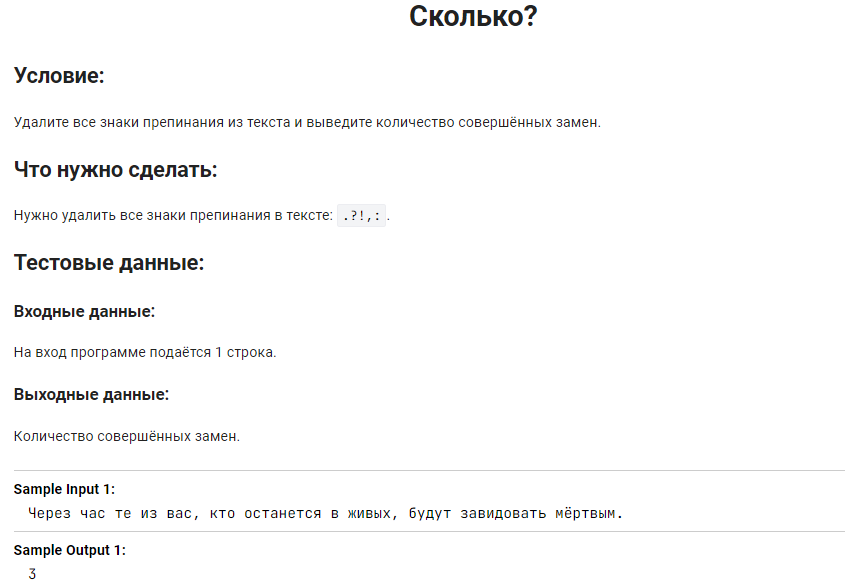

In [123]:
pattern = r'[\.?!,:]'

string = 'Через час те из вас, кто остался, узнают правду.'
print(re.subn(pattern, '', string)[1])

print(__import__('re').subn(r'[\.?!,:]', '', input())[1])

# РЕШЕНИЕ БЕЗ re
print(sum(map(lambda x: x in '.?!,:', input())))

3
'Через час те из вас, кто остался, узнают правду.'
3
'Через час те из вас, кто остался, узнают правду.'
3


In [119]:
import string
print(string.punctuation)
print(re.subn(rf'[{string.punctuation}]', '', input())[1])

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
Maybe it’s my fault. Maybe I led you to believe it was easy, when it wasn’t. Maybe I made you think my highlights started at the free throw line, and not in the gym. Maybe I made you think that every shot I took was a game winner. That my game was built on flash, and not fire. Maybe it’s my fault that you didn’t see that failure gave me strength, that my pain was my motivation. Maybe I led you to believe that basketball was a God given gift, and not something I worked for, every single day of my life.
13


## 3.9. re.escape()

**Функция re.escape(pattern)** - экранирует специальные символы в pattern.   
Полезно, если нужно использовать полученную строку как регулярное выражение, но в ней могут содержаться спецсимволы.   
Если в метод передать не сырую строку, а обычную - некоторые символы могут экранироваться и "потеряться". В итоге мы получим не ту строку для регулярного выражения, которую ожидали. Это и логично, ведь если мы передаём строку в метод re.escape(), то мы ожидаем, что она может содержать экранируемые последовательности или спецсимволы из регулярных выражений.  

**Параметр:**  pattern - строка, в которой нужно экранировать спецсимволы, чтобы впоследствии использовать в регулярном выражении.  

**Возвращаемое значение:** строка, с экранированными спецсимволами.

In [97]:
print(re.escape(r'https://stepik.org/lesson/694442/step/1?unit=694231'))

https://stepik\.org/lesson/694442/step/1\?unit=694231


### ЗАДАНИЕ  
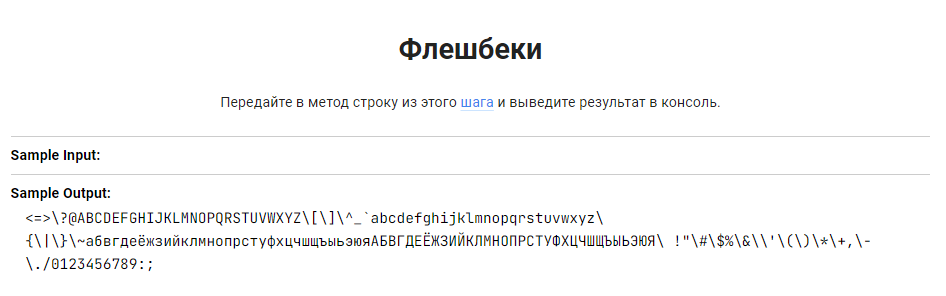

In [124]:
pattern = r'<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[]^_`abcdefghijklmnopqrstuvwxyz{|}~абвгдеёжзийклмнопрстуфхцчшщъыьэюяАБВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯ !"#$%&\'()*+,-./0123456789:;'
print(re.escape(pattern))

<=>\?@ABCDEFGHIJKLMNOPQRSTUVWXYZ\[\]\^_`abcdefghijklmnopqrstuvwxyz\{\|\}\~абвгдеёжзийклмнопрстуфхцчшщъыьэюяАБВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯ\ !"\#\$%\&\\'\(\)\*\+,\-\./0123456789:;


### Функции модуля re:         
- **re.search()** - возвращает объект Match с первым найденным совпадением в строке или None, если совпадений не нашлось.  
- **re.match()** - возвращает объект Match с совпадением в начале строки или None, если в начале строки нет совпадений.    
- **re.fullmatch()** - определяет соответствие строки шаблону. Если вся строка соответствует шаблону - выводит объект Match, иначе - None.     
- **re.finditer()** - возвращает итератор Match объектов с вхождениями переданного шаблона в строке.     
- **re.findall** - возвращает список со всеми найденными совпадениями или пустой список, если совпадений не нашлось.     
- **re.split** - разрезает текст на части по найденным совпадениям. Возвращает список частей разделённой строки или список из строки если совпадений нет.    
- **re.sub** - заменяет совпадения на переданный шаблон. Возвращает изменённую строку или изначальную строку если совпадений не нашлось.    
- **re.subn** - заменяет совпадения на переданный шаблон. Возвращает кортеж с изменённой строкой и количеством совершённых замен.      
- **re.escape** - экранирует символы в переданной строке.

# 4. Функции с группами

Рассмотрим подробнее все методы и атрибуты  

МЕТОДЫ:     
- **expand()** - работает идентично функции re.sub()    
- **group()** - возвращает найденное совпадение по номеру или имени группы     
- **groups()** - возвращает кортеж со всеми группами, кроме нулевой   
- **groupdict()** - возвращает словарь, ключи которого - имена групп, а значения - найденные совпадения этих групп   
- **start(), end()** - возвращают индексы начала и конца совпадения с регулярным выражением группы, номер или имя которой были переданы в метод     
- **span()** - возвращает кортеж с индексами начала и конца совпадения с регулярным выражением группы, номер или имя которой были переданы в метод      


АТРИБУТЫ:     
- **lastindex** - возвращает номер последней найденной группы или None, если группы не используются      
- **lastgroup** - возвращает имя последней найденной именованной группы или None, если именованные группы не используются      
- **pos** и **endpos** - используются вместе с объектом Pattern. Если обратиться к атрибутам, можно получить аргумент pos или endpos, переданный в функцию. *pos* - позиция, с которой функция начинает искать совпадения. *endpos* - позиция, до которой функция ищет совпадения.      
- **re** - возвращает объект Pattern, содержащий регулярное выражение, которое использовалось для поиска   
- **string** - возвращает строку, в которой искали совпадения 

In [2]:
# Захватим весь текст между "П" и "т" в группу с именем name
regex = r'П(?P<name>.+?)т'  
text = 'Привет, как тебя зовут?'

# span - индексы начала и конца совпадения, match - само совпадение
match = re.match(regex, text) 
print(match)

<re.Match object; span=(0, 6), match='Привет'>


### МЕТОДЫ     
### group()     
Возвращает найденное совпадение по номеру или имени группы.

In [3]:
# Если обратиться к несуществующей группе - получим ошибку
regex = r'П(?P<name>.+?)т'  
text = 'Привет, как тебя зовут?'
print(text)

print(match.group())  # Если в метод не передать аргумент - он по умолчанию выведет нулевую группу
print(match.group(0)) # Можно передать номер нужной группы в метод
print(match[0])       # Благодаря геттеру в Match-объекте к группам можно обращаться с помощью квадратных скобок

print(match.group(1)) # Получаем то, что захватила первая группа
print(match[1])       # Получаем то, что захватила первая группа через квадратные скобки

Привет, как тебя зовут?
Привет
Привет
Привет
риве
риве


In [4]:
# Если у группы есть имя, то по нему можно получить нужную группу
regex = r'П(?P<name>.+?)т'  
text = 'Привет, как тебя зовут?'
print(text)

print(match.group("name")) # Получаем то, что захватила группа с именем name
print(match["name"])       # Получаем то, что захватила группа с именем name через квадратные скобки

# Через метод можно получить сразу несколько групп. Для этого нужно указать нужные группы через запятую
print(match.group(0, "name", 1))

Привет, как тебя зовут?
риве
риве
('Привет', 'риве', 'риве')


### start() и end()    
Возвращают индексы начала и конца совпадения с регул. выражением группы, номер или имя которой были переданы в метод.

In [13]:
print(match)

print(match.start(0)) 
print(match.end(0))   
print(match.start(1)) 
print(match.end(1))   

<re.Match object; span=(0, 6), match='Привет'>
0
6
1
5


### span()    
Возвращает кортеж с индексом начала и конца совпадения группы, номер или имя которой были переданы в метод.   
Работает аналогично методам start, end, но возвращает пару чисел (в кортеже).

In [14]:
print(match)

print(match.span(0)) 
print(match.span(1))

<re.Match object; span=(0, 6), match='Привет'>
(0, 6)
(1, 5)


### groups()     
Возвращает кортеж со всеми группами, кроме нулевой.

In [22]:
print(match)
print(match.groups())

<re.Match object; span=(0, 7), match='Привет,'>
('риве', None)


In [23]:
# Если какая-либо группа ничего не нашла, то вместо найденного совпадения будет значение аргумента default, по умолчанию -None
regex = r'П(?P<name>.+?)т,(2 группа)?'
text = 'Привет, как тебя зовут?'
match = re.match(regex, text) 

print(match)
print(match.groups())                    
print(match.groups("Ничего не найдено")) 

<re.Match object; span=(0, 7), match='Привет,'>
('риве', None)
('риве', 'Ничего не найдено')


### groupdict(default = None)    
Возвращает словарь, ключи которого - имена групп, а значения - найденные совпадения этих групп.  
Если в регулярном выражении не используются именованные группы, то он вернёт пустой словарь.

In [5]:
regex = r'П(?P<name>.+?)т'  
text = 'Привет, как тебя зовут?'

print(text)
print(match.groupdict()) 

Привет, как тебя зовут?
{'name': 'риве'}


### ЗАДАНИЕ

In [53]:
regex = r'П(?P<name>.+?)в(?P<name2>2 группа)?(?P<name3>ет)?,'
text = 'Привет, как тебя зовут?'
match = re.match(regex, text) 

print(text)
print(match)

Привет, как тебя зовут?
<re.Match object; span=(0, 7), match='Привет,'>


In [56]:
print(match[0])
print(match.group(0))
print(match.group())
print(match.group(1, "name2", 0))
print(match.groups())
print(match.groups(0))

Привет,
Привет,
Привет,
('ри', None, 'Привет,')
('ри', None, 'ет')
('ри', 0, 'ет')


In [6]:
print(match.groupdict(0))
print(match.lastindex)
print(match.lastgroup)

{'name': 'ри', 'name2': 0, 'name3': 'ет'}
3
name3


### ЗАДАНИЕ  
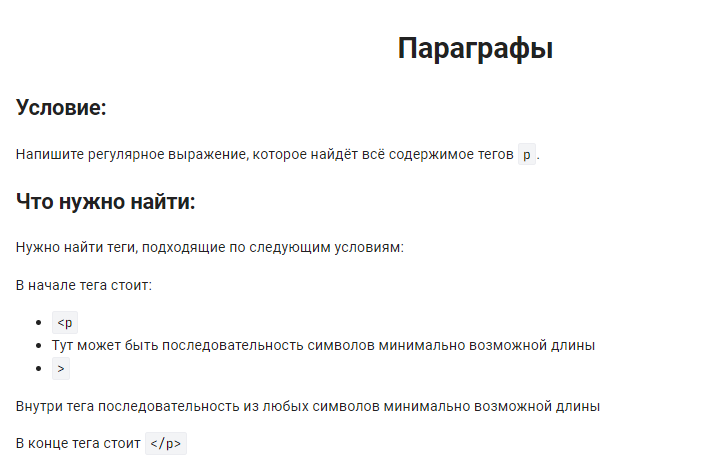

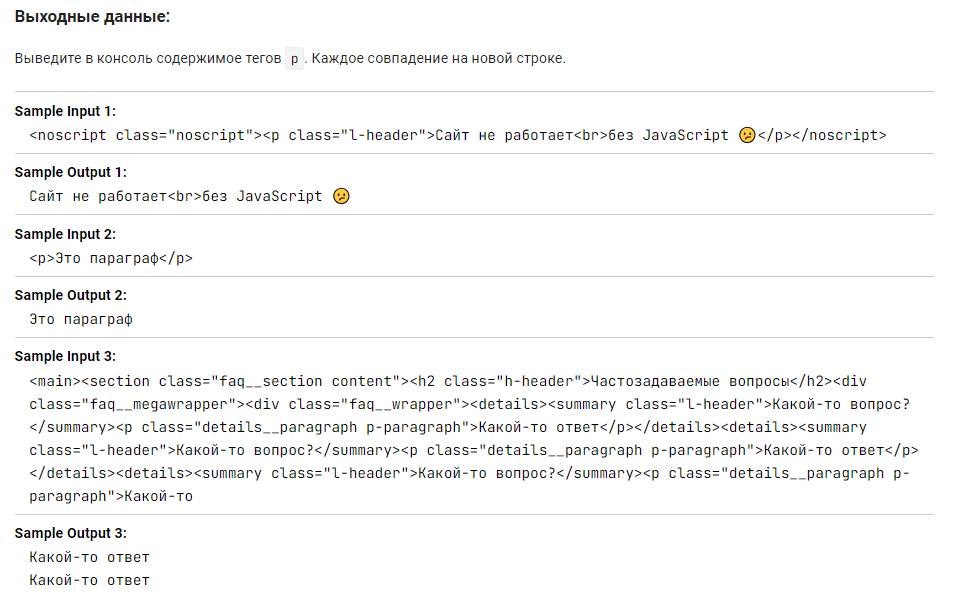

In [62]:
string_1 = '<noscript class="noscript"><p class="l-header">Сайт не работает<br>без JavaScript 😕</p></noscript>'
string_2 = '<p>Это параграф</p>'
string_3 = '<p Неправильный параграф</p></p>1</p><p>2</p><p3/p>'
string_4 = '<main><section class="faq__section content"><h2 class="h-header">Частозадаваемые вопросы</h2><div class="faq__megawrapper"><div class="faq__wrapper"><details><summary class="l-header">Какой-то вопрос?</summary><p class="details__paragraph p-paragraph">Какой-то ответ</p></details><details><summary class="l-header">Какой-то вопрос?</summary><p class="details__paragraph p-paragraph">Какой-то ответ</p></details><details><summary class="l-header">Какой-то вопрос?</summary><p class="details__paragraph p-paragraph">Какой-то'

In [185]:
def find_expressions(string):
    regex = r'(?=<p.*?>)(.+?)(?<=<\/p>)'
    for i in re.findall(regex, string):
        r = '(?P<first><.+?>)(?P<second>.+)(?P<third><.+?>)'
        if re.search(r, i):
            print(re.search(r, i).group('second'))


for i in [string_1, string_2, string_3, string_4]:
    find_expressions(i)

Сайт не работает<br>без JavaScript 😕
Это параграф
2
Какой-то ответ
Какой-то ответ


In [195]:
for i in re.findall(r'<p.*?>(.*?)</p>', input()):
    print(i)

<p Неправильный параграф</p></p>1</p><p>2</p><p3/p>

2


In [219]:
rez = re.finditer(r'(?:<p.*?>)(?<!</p>)(.*?)</p>', input())
for i in rez:
    print(i.group(1))

<p Неправильный параграф</p></p>1</p><p>2</p><p3/p>
2


In [220]:
# print(*__import__("re").findall(r'<p.*?>(.*?)</p>', input()), sep='\n')
print(*re.findall(r'<p.*?>(.*?)</p>', input()), sep = '\n')

<p Неправильный параграф</p></p>1</p><p>2</p><p3/p>

2


In [221]:
pattern = r'(<p.*?>)(.*?)(\<\/p\>)'
s = input()
func = lambda z: z.group(2)
res = re.finditer(pattern, s)
for ch in res: 
    print(ch.group(2))

<p class="details__paragraph p-paragraph">Какой-то ответ</p> <p class="details__paragraph p-paragraph">Какой-то ответ</p>
Какой-то ответ
Какой-то ответ


### АТРИБУТЫ  

In [46]:
regex = r'П(?P<name>.+?)т,(2 группа)?'
text = 'Привет, как тебя зовут?'
match = re.match(regex, text) 

print(text)
print(match)

# pos и endpos используются вместе с объектом Pattern 
# Если обратиться к атрибутам, можно получить аргумент pos или endpos, переданный в функцию 
# pos - позиция, с которой функция начинает искать совпадения, endpos - позиция, до которой функция ищет совпадения
print(match.pos)     # 0
print(match.endpos)  # 23

# re - возвращает объект Pattern, содержащий регулярное выражение, которое использовалось для поиска
print(match.re) 

# string - возвращает строку, в которой искали совпадения
print(match.string) 

# lastindex - возвращает номер последней найденной группы или None, если группы не используются  
print(match.lastindex) 

# lastgroup - возвращает имя последней найденной именованной группы или None, если именованные группы не используются
print(match.lastgroup) # name

Привет, как тебя зовут?
<re.Match object; span=(0, 7), match='Привет,'>
0
23
re.compile('П(?P<name>.+?)т,(2 группа)?')
Привет, как тебя зовут?
1
name


In [61]:
regex = r'П(?P<name>.+?)в(?P<name2>2 группа)?(?P<name3>ет)?,'
text = 'Привет, как тебя зовут?'
match = re.match(regex, text) 

print(text)
print(match)

Привет, как тебя зовут?
<re.Match object; span=(0, 7), match='Привет,'>


In [73]:
print(match.group(0))
print(match[0])
print(match.group(1))
print(match.group(2))
print(match.group(3))
print(match.group(1, "name2", 0))

Привет,
Привет,
ри
None
ет
('ри', None, 'Привет,')


In [74]:
print(match.groups())
print(match.groups(0))
print(match.groupdict())
print(match.groupdict(0))
print(match.lastindex)
print(match.lastgroup)

('ри', None, 'ет')
('ри', 0, 'ет')
{'name': 'ри', 'name2': None, 'name3': 'ет'}
{'name': 'ри', 'name2': 0, 'name3': 'ет'}
3
name3


### Группы и re.findall()  
Если в регулярном выражении используются скобочные группы, то вместо списка со всеми соответствиями вернётся список с кортежами совпадений соответствующих групп.

In [77]:
regex = r'(=)(\w{3})='
string = '=abc= =123= =def= 456 =fed= =321= =cba='

result = re.findall(regex, string)
print(result) 

[('=', 'abc'), ('=', '123'), ('=', 'def'), ('=', 'fed'), ('=', '321'), ('=', 'cba')]


### ЗАДАНИЕ  
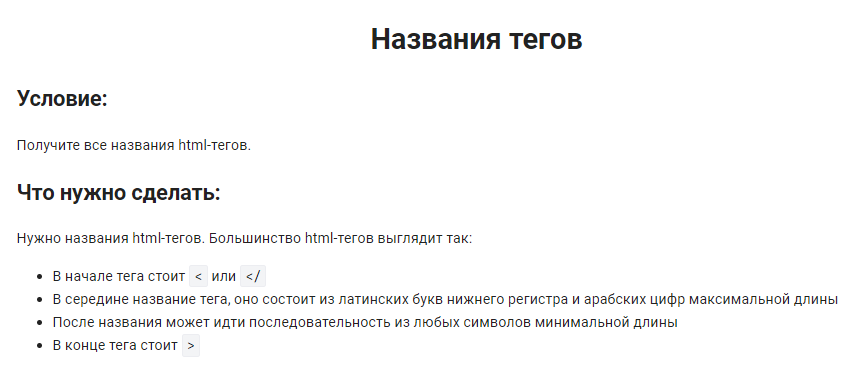

In [64]:
string = '<div class="o3j99 LLD4me yr19Zb LS8OJ"><style>.LS8OJ{display:flex;flex-direction:column;align-items:center}.k1zIA{height:100%;margin-top:auto}</style><div class="k1zIA rSk4se"><style>.rSk4se{max-height:92px;position:relative}.lnXdpd{max-height:100%;max-width:100%;object-fit:contain;object-position:center bottom;width:auto}</style><img class="lnXdpd" alt="Google" src="/images/branding/googlelogo/2x/googlelogo_color_272x92dp.png" srcset="/images/branding/googlelogo/1x/googlelogo_color_272x92dp.png 1x, /images/branding/googlelogo/2x/googlelogo_color_272x92dp.png 2x" data-atf="1" data-frt="0" width="272" height="92"></div></div>'

In [40]:
regex = r'</?([a-z0-9]+)[>]*'
regex = r'</?(\w+?)\b'
regex = r'</?([a-z0-9]+).*?>'
regex = r'(?<=<)/?(.*?)(?:\s.*?)*(?=>)'

print(re.findall(regex, string))

['div', 'style', 'style', 'div', 'style', 'style', 'img', 'div', 'div']


In [41]:
print(__import__('re').findall(r"</?([a-z\d]+).*?>", input()))
print(__import__('re').findall(r'(?:</?)([a-z0-9]+)', input()))

<div class="o3j99 LLD4me yr19Zb LS8OJ"><style>.LS8OJ{display:flex;flex-direction:column;align-items:center}.k1zIA{height:100%;margin-top:auto}</style><div class="k1zIA rSk4se"><style>.rSk4se{max-height:92px;position:relative}.lnXdpd{max-height:100%;max-width:100%;object-fit:contain;object-position:center bottom;width:auto}</style><img class="lnXdpd" alt="Google" src="/images/branding/googlelogo/2x/googlelogo_color_272x92dp.png" srcset="/images/branding/googlelogo/1x/googlelogo_color_272x92dp.png 1x, /images/branding/googlelogo/2x/googlelogo_color_272x92dp.png 2x" data-atf="1" data-frt="0" width="272" height="92"></div></div>
['div', 'style', 'style', 'div', 'style', 'style', 'img', 'div', 'div']
<div class="o3j99 LLD4me yr19Zb LS8OJ"><style>.LS8OJ{display:flex;flex-direction:column;align-items:center}.k1zIA{height:100%;margin-top:auto}</style><div class="k1zIA rSk4se"><style>.rSk4se{max-height:92px;position:relative}.lnXdpd{max-height:100%;max-width:100%;object-fit:contain;object-posit

### Группы и re.split()  
Если в шаблоне регулярного выражения используются групппы, то их значения поместятся между разделёнными строками.

In [91]:
# Если в шаблоне нет групп, re.split работает так же, как и str.split (просто разделяет строку по шаблону)
res1 = re.split(r'\s[+*=]\s', '2 + 2 * 2 = 6')
print(res1)

# Если использовать группы, между каждыми разделёнными строками окажутся значения из групп
res2 = re.split(r'(\s)([+*=])(\s)', '2 + 2 * 2 = 6')
res22 = re.split(r'(\s[+*=]\s)', '2 + 2 * 2 = 6')
print(res2)
print(res22)

# Если убрать ненужные группы из второго примера, польза применения группы с re.split становится очевидной
res3 = re.split(r'\s([+*=])\s', '2 + 2 * 2 = 6')
print(res3)

['2', '2', '2', '6']
['2', ' ', '+', ' ', '2', ' ', '*', ' ', '2', ' ', '=', ' ', '6']
['2', ' + ', '2', ' * ', '2', ' = ', '6']
['2', '+', '2', '*', '2', '=', '6']


### Группы в re.sub() и re.subn()  
Группы в re.sub(pattern, replace, string) и re.subn(pattern, replace, string) можно использовать в заменах.

In [109]:
string = "Не понимаю людей, которые пишут дату в формате mm/dd/yyyy. Формат 02/22/2022 и 07/13/2022..."
print(re.sub(r'(\d{2}).(\d{2}).(\d{4})', r'\2.\1.\3', string))
print(re.subn(r'(\d{2}).(\d{2}).(\d{4})', r'\2.\1.\3', string))

Не понимаю людей, которые пишут дату в формате mm/dd/yyyy. Формат 22.02.2022 и 13.07.2022...
('Не понимаю людей, которые пишут дату в формате mm/dd/yyyy. Формат 22.02.2022 и 13.07.2022...', 2)


### Функции в re.sub() и re.subn()  
В методы re.sub() и re.subn() можно также передать функцию, которая будет генерировать строку-заменитель.   
В функцию передаётся Match-объект. Таким образом можно получить доступ к группам, изменять и обрабатывать эти данные.

In [69]:
# Найдем все слова в строке и заменим их на их же длину
def len_func(m):
    return str(len(m[0]))

regex = r'[a-zA-Z]{1,}'
text = 'Lorem Ipsum is simply dummy text of the printing and typesetting industry.'

res_func = re.sub(regex, len_func, text)
res_lambda = re.sub(regex, lambda m: str(len(m[0])), text)

print(text)
print(re.findall(regex, text))
print()
print(res_func) 
print(res_lambda)
print(res_func == res_lambda)  

Lorem Ipsum is simply dummy text of the printing and typesetting industry.
['Lorem', 'Ipsum', 'is', 'simply', 'dummy', 'text', 'of', 'the', 'printing', 'and', 'typesetting', 'industry']

5 5 2 6 5 4 2 3 8 3 11 8.
5 5 2 6 5 4 2 3 8 3 11 8.
True
